In [2]:
import pandas as pd
import numpy as np

import os
from tqdm import tqdm_notebook, tqdm
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

import re
import urllib.parse as par

from wordcloud import WordCloud
import plotly.express as px

import random

from collections import Counter

from konlpy.tag import Okt, Mecab
okt = Okt()
mecab = Mecab(dicpath=r"C:/mecab/mecab-ko-dic")
use_cuda = True

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

c:\Users\lucky\anaconda3\envs\genie\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\lucky\anaconda3\envs\genie\lib\site-packages\numpy\.libs\libopenblas.fb5ae2tyxyh2ijrdkgdgq3xbklktf43h.gfortran-win_amd64.dll
c:\Users\lucky\anaconda3\envs\genie\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [ ]:
nltk.download('all')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\lucky\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\lucky\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\lucky\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\lucky\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\lucky\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

In [5]:
base_path = 'C:\\Users\\lucky\\Documents\\데이터온경진대회'
path1 = os.path.join(base_path, 'Search\\clean_data_fin.csv')
path2 = os.path.join(base_path, 'fighting\\test_data.csv')
df = pd.read_csv(path1)
test_data = pd.read_csv(path2)

In [6]:
only_in_testip = test_data['사용자IP'].unique()
df = df[~df['사용자IP'].isin(only_in_testip)]
df

,사용자IP,로그등록시간,서비스 종류,콘텐츠 종류,웹/모바일 구분,이전URL,요청URL,검색질의어,조회 컨텐츠,유입 검색어,이전URL 도메인,추가 조회 컨텐츠,컨텐츠 코드
0,1.11.***.10,2022-02-13 19:43:47,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,NaN,NPAP12584646,NaN,www.google.com,NPAP12584646,NPAP
1,1.11.***.10,2022-02-13 19:43:59,원문보기,NaN,웹,https://scienceon.kisti.re.kr/srch/selectPORSr...,/commons/util/originalView.do,NaN,NaN,NaN,scienceon.kisti.re.kr,NPAP12584646,NPAP
2,1.11.***.10,2022-02-18 14:05:43,상세보기,동향,웹,https://www.google.com/,/srch/selectPORSrchTrend.do,NaN,SCTM00127293,NaN,www.google.com,SCTM00127293,SCTM
3,1.11.***.10,2022-03-31 16:12:04,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,NaN,JAKO201328053101572,NaN,www.google.com,JAKO201328053101572,JAKO
4,1.11.***.10,2022-04-14 23:08:18,상세보기,보고서,웹,https://www.google.com/,/srch/selectPORSrchReport.do,NaN,KAR2012059269,NaN,www.google.com,KAR2012059269,KAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25633224,91.240.***.73,2022-05-18 21:24:21,상세보기,특허,웹,https://search.naver.com/search.naver?sm=tab_h...,/srch/selectPORSrchPatent.do,NaN,USP2007077241088,"탭+forming,+cutting+tap+tool",search.naver.com,USP2007077241088,USP
25633225,91.240.***.73,2022-05-20 19:45:54,상세보기,특허,웹,https://www.google.com/,/srch/selectPORSrchPatent.do,NaN,KOR1019980015276,NaN,www.google.com,KOR1019980015276,KOR
25633226,91.240.***.8,2022-08-17 22:25:11,상세보기,보고서,웹,NaN,/srch/selectPORSrchReport.do,NaN,TRKO201800042334,NaN,NaN,TRKO201800042334,TRKO
25633227,91.240.***.89,2022-08-30 13:50:07,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,NaN,DIKO0014916091,NaN,www.google.com,DIKO0014916091,DIKO


In [7]:
df.isnull().sum()

사용자IP               0
로그등록시간              0
서비스 종류              0
콘텐츠 종류        4133698
웹/모바일 구분            0
이전URL        13077825
요청URL               0
검색질의어        23183197
조회 컨텐츠        6783982
유입 검색어       24857944
이전URL 도메인    13309143
추가 조회 컨텐츠     3563729
컨텐츠 코드             89
dtype: int64

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#5B9FF5; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #5B9FF5">유입 검색어</p>

사용자의 이전 URL 도메인 중, 주 도메인에 해당하는 NAVER, GOOGLE, SCIENCEON이 대상이다.

해당 도메인에 검색어를 입력하여, SCIENCEON에 접속한 경우의 검색어를 **유입 검색어**로 분류하였다.

**유입 검색어**의 경우, 이전URL 칼럼 값에서 주소 파라미터의 keyword 부분을 Decoding 하여 전처리 시 추출하였다.


In [8]:
refdf = df.copy()

In [9]:
refdf.drop(columns = ['검색질의어', '이전URL', '요청URL'], inplace = True)
print(f'원본 데이터 개수 : {len(refdf)}')

원본 데이터 개수 : 25557867


In [10]:
refdf.fillna('None', inplace=True)
refdf.isnull().sum()

사용자IP        0
로그등록시간       0
서비스 종류       0
콘텐츠 종류       0
웹/모바일 구분     0
조회 컨텐츠       0
유입 검색어       0
이전URL 도메인    0
추가 조회 컨텐츠    0
컨텐츠 코드       0
dtype: int64

유입 검색어가 존재하는 데이터 개수를 확인한다.

In [11]:
refdf = refdf[refdf['유입 검색어'] != 'None']
print(f'유입 검색어가 존재하는 데이터 개수 : {len(refdf)}')

유입 검색어가 존재하는 데이터 개수 : 699923


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#428DFC; font-size:75%; text-align:left;padding: 0px; border-bottom: 3px solid #428DFC">유입 검색어 추가 전처리</p>

### [1] 유입 검색어 기본 텍스트 전처리

##### [HTTP 포함 Case]

1. **Decoding 추가**: 이전 전처리 과정에서 누락된 Decoding 부분을 추가 시행<br>
단, URL keyword 파라미터 뒤에 간혹 값이 존재하지 않는 경우는 유입 검색어가 존재하지 않는 것으로 분류

2. **단어 결합 수정**: 여러 단어가 띄어쓰기 간격 기준으로 '+'로 연결되고 링크가 결합된 형태는 '+'를 제거하고 링크를 제거. 

   예시: '주의력+결핍+과잉+행동장애의+자기조절과+학교부적응+개선을+위한+뇌과학+접근의+뉴로피드백+활용+간호중재+표준개발과+적용++출처+:+BBS+NEWS(https://news.bbsi.co.kr)' 
   
         주의력 결핍 과잉 행동장애의 자기조절과 학교부적응 개선을 위한 뇌과학 접근의 뉴로피드백 활용 간호중재 표준개발과 적용 출처

3. **유입 검색어 값 채우기**: 그 외 유입 검색어가 존재하지 않는 링크의 경우, 유입 검색어 값에 '사이언스온' 값으로 채움

##### [HTTP를 포함하지 않는 Case]

1. **특수 기호 제거**: 텍스트에서 특수 기호만 제거

In [12]:
class ReferSearchProcessing:
    def __init__(self, df):
        self.df = df
        
    def clean_text(self, text):
        '''
        기본 텍스트 전처리
        '''
        if not isinstance(text, str):
            text = str(text) 

        text_rmv = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\|\:\;\!\,\_\$\'\"]', ' ', text)  
        #text_rmv = text_rmv.lower()  # 소문자로 변환
        text_rmv = re.sub(r'\s+', ' ',  text_rmv)  # 여분의 공백 제거
        text_rmv = re.sub(r'<[^>]+>', '',  text_rmv)  # HTML 태그 제거
        text_rmv = re.sub(r'\s+', ' ',  text_rmv)  # 공백 제거
        text_rmv = re.sub(r"^\s+", '',  text_rmv)  # 시작 부분의 공백 제거
        text_rmv = re.sub(r'\s+$', '',  text_rmv)  # 끝 부분의 공백 제거
        return  text_rmv
    
    def nothttpremove(self):
        '''
        유업 검색어가 http를 포함하지 않는 경우,
        일반 특수 기호 제거
        '''
        filtered_df = self.df[~self.df['유입 검색어'].str.contains('http')]
        filtered_df['유입 검색어'] = filtered_df['유입 검색어'].apply(self.clean_text)
        return filtered_df
        
    def httpdecode(self):
        '''
        유입 검색어가 http를 포함하면서
        이전 전처리 과정에서 keyword 파라미터 뒤 값의 디코딩이 누락된 경우에는 추가적으로 디코딩 처리
        그러나, keyword 파라미터 뒤 값 존재하지 않는 경우는 공백('')만 잔여하게 된다.
        '''
        filtered_df = self.df[self.df['유입 검색어'].str.contains('http') & self.df['유입 검색어'].str.contains('keyword')]

        def process_referrer(referrer):
            referrer_parts = referrer.split('&')
            keyword_part = referrer_parts[-1].split('=')[-1]
            if '%' in keyword_part:
                return par.unquote(keyword_part)
            else:
                return keyword_part

        filtered_df['유입 검색어'] = filtered_df['유입 검색어'].apply(process_referrer)
        return filtered_df
    
    def httpscienceon(self):
        '''
        유입 검색어가 http를 포함하면서,
        scienceon 링크인 경우
        
        이전URL - 요청URL 간의 이동이 내부 사이트 이동으로,
        사이언스온 내부 이동시 검색어가 존재하지 않는 다면, '사이언스온'으로 값을 채워주었다.
        '''
        filtered_df = self.df[~self.df['유입 검색어'].str.contains('site') & self.df['유입 검색어'].str.contains('scienceon')]
        filtered_df['유입 검색어'] = '사이언스온'
        return filtered_df
    
    def httpremovePlus(self):
        '''
        유입 검색어가 http를 포함하면서
        여러 단어가 +로 연결 되어 있고, 뒤에 링크가 결합된 경우
        +와 링크를 제거 하여, 단어 만 남긴다.
        특수 기호 또한 제거한다.
        '''
        filtered_df = self.df[self.df['유입 검색어'].str.contains('http') & self.df['유입 검색어'].str.contains(r'\+')]

        def processor_plus(plus):
            if isinstance(plus, str):
                referrer_plus_parts = plus.split('http')
                plus_part = self.clean_text(referrer_plus_parts[0].replace('+', ' ').replace('site', ''))
                term_part = plus_part.replace('  ', ' ')
                return term_part
            else:
                return plus
    
        filtered_df['유입 검색어'] = filtered_df['유입 검색어'].apply(processor_plus)
        return filtered_df
    
    def result(self):
        '''
        1) http를 포함하지 않는 유입 검색어 전처리 기능 수행
        2) http를 포함하며, 이전URL 에서 keyword 파라미터 디코딩 누락된 값 추가 처리
        3) http를 포함하며, 사이언스 온 내부 이동시 유입 검색어가 존재하지 않는다면 '사이언스온'으로 값 대체 
        4) 디코딩된 유입 검색어 텍스트 전처리 기능 수행
        '''
        df_nothttpremove = self.nothttpremove()
        df_httpdecode = self.httpdecode()
        df_httpscienceon = self.httpscienceon()
        df_httpremoveplus = self.httpremovePlus()
        
        result_df = pd.concat([df_nothttpremove, df_httpdecode, df_httpscienceon, df_httpremoveplus], ignore_index=False)
        return result_df

In [13]:
ref = ReferSearchProcessing(refdf)
refdf = ref.result()

In [14]:
refdf.isnull().sum()

사용자IP        0
로그등록시간       0
서비스 종류       0
콘텐츠 종류       0
웹/모바일 구분     0
조회 컨텐츠       0
유입 검색어       0
이전URL 도메인    0
추가 조회 컨텐츠    0
컨텐츠 코드       0
dtype: int64

#### [2] 유입 검색어 한*영 공통 전처리
특수기호 중에서는 온점과 하이픈 및 숫자, 한국어, 영어를 제외한 모든 문자를 제거.

    - 온점과 하이픈의 경우, 전문 용어나 문헌 정보 구분 위해 남겨두었다.

In [15]:
def remove_special_characters(text):
    if not isinstance(text, str):
        return 'None'
    cleaned_text = re.sub(r'[^0-9가-힣a-zA-Z.\-]', '', text)
    return cleaned_text

In [16]:
refdf['유입 검색어'] = refdf['유입 검색어'].apply(remove_special_characters)

유입 검색어 텍스트의 형태는 다음과 같이 3가지 경우로 구분된다.

1. **한국어만 포함한 경우**
2. **영어만 포함한 경우**
3. **한국어와 영어가 혼재한 경우**

이에 따라 다음과 같은 분류를 추가한다.

- **유입_한국어_ONLY**: 한국어만 포함한 행을 분리
- **유입_영어_ONLY**: 영어만 포함한 행을 분리
- **유입_한국어_MIX**: 한국어와 영어가 혼재한 행에서 한국어만 분리
- **유입_영어_MIX**: 한국어와 영어가 혼재한 행에서 영어만 분리


유입 검색어 칼럼에서 한국어만 포함된 행 분리

In [17]:
refdf['유입_한국어_ONLY'] = 'None'
korean_indices = refdf[refdf['유입 검색어'].str.match(r'^[가-힣\s]+$')].index
refdf.loc[korean_indices, '유입_한국어_ONLY'] = refdf.loc[korean_indices, '유입 검색어']

유입 검색어 칼럼에서 영어만 포함된 행 분리

In [18]:
refdf['유입_영어_ONLY'] = 'None'
english_indices = refdf[refdf['유입 검색어'].str.match(r'^[a-zA-Z]+$')].index
refdf.loc[english_indices, '유입_영어_ONLY'] = refdf.loc[english_indices, '유입 검색어']

유입 검색어 칼럼에서 한국어와 영어가 혼재된 행에서 한국어만 분리

In [19]:
refdf['유입_한국어_MIX'] = 'None'
def process_search_text(text):
    if re.match(r'^[가-힣\s]+$', text) or re.match(r'^[a-zA-Z\s]+$', text):
        return 'None'
    return text

refdf['유입_한국어_MIX'] = refdf['유입 검색어'].apply(process_search_text)

In [20]:
for idx, row in tqdm_notebook(refdf.iterrows()):
    text = row['유입_한국어_MIX']
    if isinstance(text, str):
        korean_text = ''.join(re.findall(r'[가-힣]+', text))
        if korean_text:
            refdf.at[idx, '유입_한국어_MIX'] = korean_text
        else:
            refdf.at[idx, '유입_한국어_MIX'] = 'None'

0it [00:00, ?it/s]

유입 검색어 칼럼에서 한국어와 영어가 혼재된 행에서 영어만 분리

In [21]:
refdf['유입_영어_MIX'] = 'None'
def process_search_text(text):
    if re.match(r'^[가-힣\s]+$', text) or re.match(r'^[a-zA-Z\s]+$', text):
        return 'None'
    return text

refdf['유입_영어_MIX'] = refdf['유입 검색어'].apply(process_search_text)

In [22]:
for idx, row in tqdm_notebook(refdf.iterrows()):
    text = row['유입_영어_MIX']
    if isinstance(text, str):
        english_text = ''.join(re.findall(r'[a-zA-Z]+', text))
        if english_text:
            refdf.at[idx, '유입_영어_MIX'] = english_text
        else:
            refdf.at[idx, '유입_영어_MIX'] = 'None'

0it [00:00, ?it/s]

In [23]:
refdf.head(3)

,사용자IP,로그등록시간,서비스 종류,콘텐츠 종류,웹/모바일 구분,조회 컨텐츠,유입 검색어,이전URL 도메인,추가 조회 컨텐츠,컨텐츠 코드,유입_한국어_ONLY,유입_영어_ONLY,유입_한국어_MIX,유입_영어_MIX
9,1.11.***.100,2022-05-14 17:41:34,상세보기,특허,웹,KOR1020130073502,트리스트리메틸실릴보레이트,search.naver.com,KOR1020130073502,KOR,트리스트리메틸실릴보레이트,None,None,None
10,1.11.***.100,2022-08-20 20:55:43,상세보기,보고서,웹,TRKO201800014516,이질환현훈,m.search.naver.com,TRKO201800014516,TRKO,이질환현훈,None,None,None
26,1.11.***.102,2022-01-30 19:44:08,상세보기,논문,웹,JAKO201526650061556,신규교사연수수학,m.search.naver.com,JAKO201526650061556,JAKO,신규교사연수수학,None,None,None


In [24]:
refdf2 = refdf.copy()

In [25]:
refdf2.to_csv('ref_common_contents.csv', index=False)

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#5B9FF5; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #5B9FF5">조회 컨텐츠</p>

조회 컨텐츠가 존재하는 데이터에 한 해, 유입 검색어가 의미가 있으므로, 조회 컨텐츠가 존재하는 데이터를 확인한다.

In [26]:
refdf2 = refdf2[refdf2['추가 조회 컨텐츠'] != 'None']
print(f'추가 조회 컨텐츠가 존재하는 데이터 개수 : {len(refdf)}')

추가 조회 컨텐츠가 존재하는 데이터 개수 : 699902


유입 검색어를 추출한 이전URL 도메인을 확인해보니 모두 naver가 포함되어 있다.

In [27]:
refdf2['이전URL 도메인'].unique() 

array(['search.naver.com', 'm.search.naver.com', 's.search.naver.com',
       'm.keep.naver.com', 'm.cafe.naver.com', 'cafe.naver.com',
       'm.blog.naver.com', 'keep.naver.com', 'oet.sentinel.navercorp.com',
       'd2m0.search.naver.com:10484', 'search-naver-com.libra.cnu.ac.kr'],
      dtype=object)

사용자A가 조회 컨텐츠B를 다수 조회 한 경우 보다, 다수 사용자들이 조회 컨텐츠B를 조회 한 경우가 조회 컨텐츠B에 대한 신뢰가 높다.
    
    - 동시에 다음 3칼럼이 [사용자 IP, 추가 조회 컨텐츠, 유입 검색어] 중복을 가지는 행 중에서 첫 번째 행만을 남기고 제거한다.

In [28]:
refdf2 = refdf2.drop_duplicates(subset=['사용자IP', '추가 조회 컨텐츠', '유입 검색어'], keep='first')
print(f'현재 데이터 개수 : {len(refdf2)}')

현재 데이터 개수 : 640243


다수 사용자 IP에 의해 조회된 컨텐츠 중에서 5번 이하로 조회된 컨텐츠는 신뢰할 수 없는 컨텐츠로 간주하고 제거한다.

In [29]:
dropIndex = refdf2[refdf2['추가 조회 컨텐츠'].map(refdf2['추가 조회 컨텐츠'].value_counts()) <= 5].index
refdf2.drop(dropIndex, inplace=True)
print(f'현재 데이터 개수 : {len(refdf2)}')

현재 데이터 개수 : 238485


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#6F75DE; font-size:70%; text-align:left;padding: 0px; border-bottom: 3px solid #6F75DE">조회 컨텐츠 - 유입 한국어</p>

### [1] 유입 한국어 데이터 확인
유입_한국어_ONLY 칼럼과, 유입_한국어_MIX 칼럼의 값이 존재하는 데이터를 확인한다.

유입 검색어 중 한국어만 존재하는 문자열을 추출한 칼럼 : '유입_한국어_ONLY'

유입 검색어 중 한국어와 영어가 혼재된 문자열에서 한국어를 추출한 칼럼 : '유입_한국어_MIX'

In [30]:
refdfKrOnly = refdf2[(refdf2['유입_한국어_ONLY'] != 'None')]
refdfKrMix = refdf2[(refdf2['유입_한국어_MIX'] != 'None')]
print(f'유입 한국어 ONLY 개수 : {len(refdfKrOnly)} , 유입 한국어 MIX 개수 : {len(refdfKrMix)}')

유입 한국어 ONLY 개수 : 202079 , 유입 한국어 MIX 개수 : 28001


유입 한국어 ONLY 

In [31]:
refdfKrOnly = refdfKrOnly[['사용자IP', '서비스 종류', '콘텐츠 종류', '추가 조회 컨텐츠', '유입 검색어', '이전URL 도메인', '유입_한국어_ONLY']]
refdfKrOnly.reset_index(drop=True, inplace=True)
refdfKrOnly

,사용자IP,서비스 종류,콘텐츠 종류,추가 조회 컨텐츠,유입 검색어,이전URL 도메인,유입_한국어_ONLY
0,1.11.***.105,상세보기,논문,JAKO200833041404985,단회뇨적게나오면,m.search.naver.com,단회뇨적게나오면
1,1.11.***.105,상세보기,논문,DIKO0014164683,펌중화,m.search.naver.com,펌중화
2,1.11.***.105,상세보기,보고서,TRKO201800036969,양쪽폐악설음,m.search.naver.com,양쪽폐악설음
3,1.11.***.107,상세보기,논문,DIKO0011081726,외국의저출산해결,m.search.naver.com,외국의저출산해결
4,1.11.***.107,상세보기,동향,SCTM00055788,체감온도공식,search.naver.com,체감온도공식
...,...,...,...,...,...,...,...
202074,61.97.***.152,상세보기,논문,DIKO0010358144,가족공감성프로그램논문,m.search.naver.com,가족공감성프로그램논문
202075,61.97.***.34,상세보기,논문,DIKO0011595385,유아지역사회논문,m.search.naver.com,유아지역사회논문
202076,61.98.***.128,상세보기,논문,DIKO0009286341,건강증진이론논문,search.naver.com,건강증진이론논문
202077,61.98.***.132,상세보기,보고서,KAR2009042062,식물기반바이오의약품,search.naver.com,식물기반바이오의약품


유입 한국어 MIX

In [32]:
refdfKrMix = refdfKrMix[['사용자IP', '서비스 종류', '콘텐츠 종류', '추가 조회 컨텐츠', '유입 검색어', '이전URL 도메인', '유입_한국어_MIX']]
refdfKrMix.reset_index(drop=True, inplace=True)
refdfKrMix

,사용자IP,서비스 종류,콘텐츠 종류,추가 조회 컨텐츠,유입 검색어,이전URL 도메인,유입_한국어_MIX
0,1.11.***.134,상세보기,논문,NPAP12913269,SNS가청소년가치관에미치는영향,search.naver.com,가청소년가치관에미치는영향
1,1.11.***.149,상세보기,논문,DIKO0014244029,공정불량예측활동FMEA,search.naver.com,공정불량예측활동
2,1.11.***.157,상세보기,논문,JAKO201103750649567,Lalonde건강결정요인,m.search.naver.com,건강결정요인
3,1.11.***.162,상세보기,보고서,TRKO201200010091,c4식물종류,search.naver.com,식물종류
4,1.11.***.170,상세보기,보고서,TRKO201800042638,한국농촌경제연구원2016반려동물연관산업발전방안연구,search.naver.com,한국농촌경제연구원반려동물연관산업발전방안연구
...,...,...,...,...,...,...,...
27996,58.140.***.91,상세보기,논문,JAKO201310076760408,막걸리와HDL콜레스테롤,m.search.naver.com,막걸리와콜레스테롤
27997,58.184.***.148,상세보기,논문,NPAP11185423,HFCs측정,search.naver.com,측정
27998,61.105.***.128,상세보기,논문,NART56240996,히브리서13장14장,m.search.naver.com,히브리서장장
27999,61.105.***.172,상세보기,논문,DIKO0013539084,kpop이발전할수있는방안,search.naver.com,이발전할수있는방안


### [2] 한국어 주요 명사 키워드 추출 - [3] 한국어 불용어 추가 제거
특정 조회 컨텐츠가 조회되는 데, 사용자IP들이 입력한 **유입 검색어** 중 

**한국어**에 해당하는 전체 텍스트 데이터를 모아서, 

그 중에서 가장 빈도가 높은 명사를 찾아서 이 명사들을 빈도 순위에 따라 키워드1, 키워드2, 키워드3 열에 저장한다.
    
    - 유입 한국어 ONLY 에 해당하는 전체 텍스트 데이터 들을 모아 처리
    - 유입 한국어 MIX 에 해당하는 전체 텍스트 데이터 들을 모아 처리

Mecab 형태소 분석기의 경우, 형태소 분석기 중 가장 연산속도가 빠른 형태소 분석기며, 분석 품질도 상위권이다.

이 데이터셋의 경우 데이터가 많아 시간 상 연산 속도가 가장 중요하여, Mecab을 선택하였고,

Mecab 형태소 분석기로 추출된 명사를 Counter() 함수를 사용하여, 불용어를 제외하고, 빈도수를 구하였다.

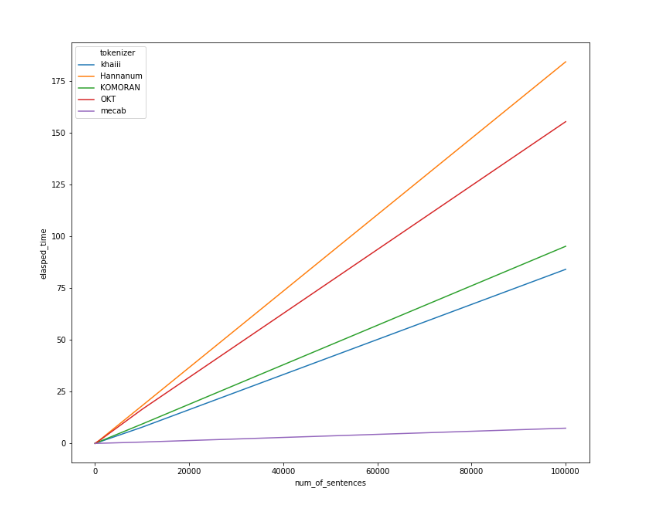

In [33]:
stop_words = ['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주', '등', '한', '과', '의', '에' ,'를', '로', '을']

In [34]:
def extract_keywords_common(df, stop_words, input_column, output_columns):
    '''
    특정 조회 컨텐츠에 대한 
    유입 검색어의 주요 키워드 명사 빈도 추출 하는 함수 
    '''
    df[output_columns[0]] = ""
    df[output_columns[1]] = ""
    df[output_columns[2]] = ""

    for key_content in tqdm(df['추가 조회 컨텐츠'].unique(), desc='processing'):
        user_data = df[df['추가 조회 컨텐츠'] == key_content][input_column].tolist()
        user_data_sentence = ' '.join(user_data)
        nouns = mecab.nouns(user_data_sentence)
        count = Counter(nouns)

        sorted_count = [item for item in count.most_common() if item[0] not in stop_words]

        if sorted_count:
            df.loc[df['추가 조회 컨텐츠'] == key_content, output_columns[0]] = sorted_count[0][0]

        if len(sorted_count) > 1:
            df.loc[df['추가 조회 컨텐츠'] == key_content, output_columns[1]] = sorted_count[1][0]

        if len(sorted_count) > 2:
            df.loc[df['추가 조회 컨텐츠'] == key_content, output_columns[2]] = sorted_count[2][0]
    return df

유입 한국어 ONLY

In [35]:
resdfKrOnlyRes = extract_keywords_common(refdfKrOnly, stop_words, '유입_한국어_ONLY', ['키워드1_KORO', '키워드2_KORO', '키워드3_KORO'])
resdfKrOnlyRes

processing:   0%|          | 0/16338 [00:00<?, ?it/s]

processing: 100%|██████████| 16338/16338 [14:43<00:00, 18.49it/s]


,사용자IP,서비스 종류,콘텐츠 종류,추가 조회 컨텐츠,유입 검색어,이전URL 도메인,유입_한국어_ONLY,키워드1_KORO,키워드2_KORO,키워드3_KORO
0,1.11.***.105,상세보기,논문,JAKO200833041404985,단회뇨적게나오면,m.search.naver.com,단회뇨적게나오면,단회,지미,원장
1,1.11.***.105,상세보기,논문,DIKO0014164683,펌중화,m.search.naver.com,펌중화,시간,중화제,펌
2,1.11.***.105,상세보기,보고서,TRKO201800036969,양쪽폐악설음,m.search.naver.com,양쪽폐악설음,쪽,악설,기도
3,1.11.***.107,상세보기,논문,DIKO0011081726,외국의저출산해결,m.search.naver.com,외국의저출산해결,저출산,해결,방안
4,1.11.***.107,상세보기,동향,SCTM00055788,체감온도공식,search.naver.com,체감온도공식,온도,체감,실제
...,...,...,...,...,...,...,...,...,...,...
202074,61.97.***.152,상세보기,논문,DIKO0010358144,가족공감성프로그램논문,m.search.naver.com,가족공감성프로그램논문,교육,청소년,프로그램
202075,61.97.***.34,상세보기,논문,DIKO0011595385,유아지역사회논문,m.search.naver.com,유아지역사회논문,사회,지역,연계
202076,61.98.***.128,상세보기,논문,DIKO0009286341,건강증진이론논문,search.naver.com,건강증진이론논문,이론,모형,건강
202077,61.98.***.132,상세보기,보고서,KAR2009042062,식물기반바이오의약품,search.naver.com,식물기반바이오의약품,의약품,식물,자원


유입 한국어 MIX

In [36]:
resdfKrMixRes = extract_keywords_common(refdfKrMix, stop_words, '유입_한국어_MIX', ['키워드1_KORM', '키워드2_KORM', '키워드3_KORM'])
resdfKrMixRes 

processing: 100%|██████████| 7520/7520 [00:36<00:00, 204.37it/s]


,사용자IP,서비스 종류,콘텐츠 종류,추가 조회 컨텐츠,유입 검색어,이전URL 도메인,유입_한국어_MIX,키워드1_KORM,키워드2_KORM,키워드3_KORM
0,1.11.***.134,상세보기,논문,NPAP12913269,SNS가청소년가치관에미치는영향,search.naver.com,가청소년가치관에미치는영향,청소년,영향,소비
1,1.11.***.149,상세보기,논문,DIKO0014244029,공정불량예측활동FMEA,search.naver.com,공정불량예측활동,공정,불량,예측
2,1.11.***.157,상세보기,논문,JAKO201103750649567,Lalonde건강결정요인,m.search.naver.com,건강결정요인,요인,건강,결정
3,1.11.***.162,상세보기,보고서,TRKO201200010091,c4식물종류,search.naver.com,식물종류,작물,식물,벼
4,1.11.***.170,상세보기,보고서,TRKO201800042638,한국농촌경제연구원2016반려동물연관산업발전방안연구,search.naver.com,한국농촌경제연구원반려동물연관산업발전방안연구,반려,동물,발
...,...,...,...,...,...,...,...,...,...,...
27996,58.140.***.91,상세보기,논문,JAKO201310076760408,막걸리와HDL콜레스테롤,m.search.naver.com,막걸리와콜레스테롤,혈청,막걸리,콜레스테롤
27997,58.184.***.148,상세보기,논문,NPAP11185423,HFCs측정,search.naver.com,측정,측정,,
27998,61.105.***.128,상세보기,논문,NART56240996,히브리서13장14장,m.search.naver.com,히브리서장장,히브리서,장장,
27999,61.105.***.172,상세보기,논문,DIKO0013539084,kpop이발전할수있는방안,search.naver.com,이발전할수있는방안,요인,성공,세계


In [37]:
resdfKrOnlyRes2 = resdfKrOnlyRes.copy()
resdfKrMixRes2 = resdfKrMixRes.copy()

### [4] 상위 조회 콘텐츠 TOP5 조회
이전 URL 도메인 - 서비스 종류 - 콘텐츠 종류 - 키워드 경우의 수에 따른 상위 조회 콘텐츠 번호를 조회한다.

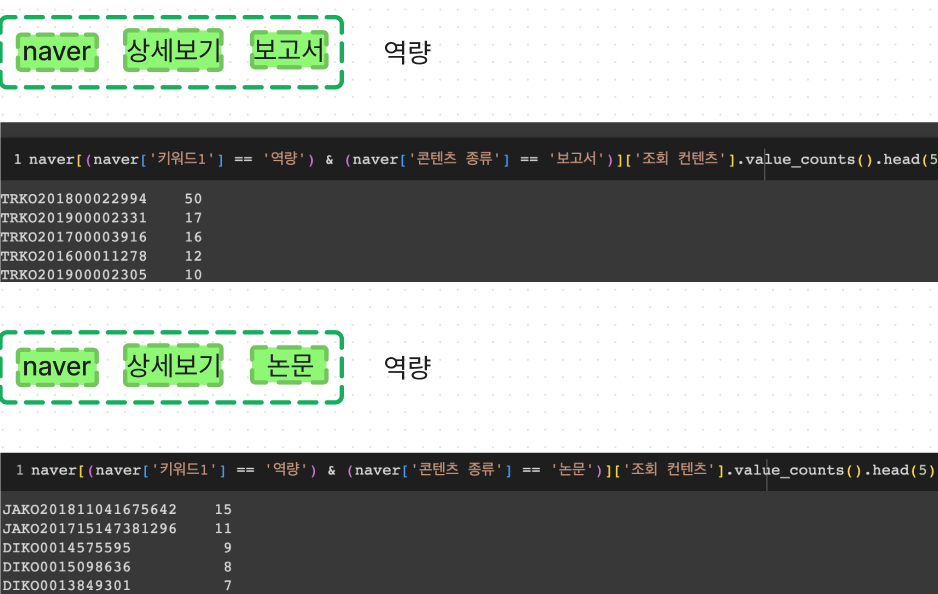

In [38]:
def extract_top_content_by_keyword_and_detail(df, keyword_column, service_column, content_column):
    '''
    서비스 종류 - 콘텐츠 종류 - 키워드 경우의 수에 따른 
    상위 조회 콘텐츠 번호를 조회하는 함수
    '''
    unique_keywords = df[keyword_column].unique()
    content_dict = {}

    for keyword in tqdm_notebook(unique_keywords):
        if keyword:
            keyword_data = df[df[keyword_column] == keyword]
            unique_services = keyword_data[service_column].unique()

            keyword_content_dict = {}
            for service in unique_services:
                service_data = keyword_data[keyword_data[service_column] == service]
                unique_contents = service_data[content_column].unique()

                content_type_dict = {}
                for content in unique_contents:
                    content_list = service_data[service_data[content_column] == content]['추가 조회 컨텐츠'].value_counts()[:5].index.tolist()
                    content_type_dict[content] = content_list

                keyword_content_dict[service] = content_type_dict

            content_dict[keyword] = keyword_content_dict

    return content_dict

In [39]:
#* 유입 한국어 ONLY
contentDicKrOnly = extract_top_content_by_keyword_and_detail(resdfKrOnlyRes2, '키워드1_KORO', '서비스 종류', '콘텐츠 종류')
#* 유입 한국어 MIX
contentDicKrMix = extract_top_content_by_keyword_and_detail(resdfKrMixRes2, '키워드1_KORM', '서비스 종류', '콘텐츠 종류')

  0%|          | 0/6156 [00:00<?, ?it/s]

  0%|          | 0/3348 [00:00<?, ?it/s]

### [5] 결과 데이터 프레임 생성
키워드, 서비스 종류, 콘텐츠 종류에 해당하는 상위 조회 콘텐츠 데이터프레임 생성

In [40]:
def flatten_content_dict(content_dict):
    '''
    키워드, 서비스 종류, 콘텐츠 종류에 
    해당하는 상위 조회 콘텐츠 딕셔너리 생성
    '''
    data = []
    for keyword, service_types in content_dict.items():
        for service_type, content_types in service_types.items():
            for content_type, content_list in content_types.items():
                for content in content_list:
                    data.append([keyword, service_type, content_type, content])
    return data

In [41]:
flattened_KrOnly = flatten_content_dict(contentDicKrOnly) #* 유입 한국어 ONLY
flattened_KrMix = flatten_content_dict(contentDicKrMix) #* 유입 한국어 MIX

In [42]:
#* 유입 한국어 ONLY
#* 상위 조회 콘텐츠 딕셔너리를 데이터프레임화
krOnly_Naver = pd.DataFrame(flattened_KrOnly, columns=['키워드', '서비스 종류', '콘텐츠 종류', '추가 조회 컨텐츠'])
krOnly_Naver 

,키워드,서비스 종류,콘텐츠 종류,추가 조회 컨텐츠
0,단회,상세보기,논문,JAKO200833041404985
1,시간,상세보기,논문,DIKO0014164683
2,시간,상세보기,논문,JAKO201403334698402
3,시간,상세보기,논문,JAKO201027463260031
4,시간,상세보기,논문,DIKO0015034160
...,...,...,...,...
13365,화,상세보기,논문,JAKO199611921349179
13366,온실가스,상세보기,보고서,TRKO201800009414
13367,대,상세보기,논문,NPAP08024739
13368,인지,상세보기,논문,DIKO0012737401


In [43]:
#* 유입 한국어 MIX
#* 상위 조회 콘텐츠 딕셔너리를 데이터프레임화
krMix_Naver = pd.DataFrame(flattened_KrMix, columns=['키워드', '서비스 종류', '콘텐츠 종류', '추가 조회 컨텐츠'])
krMix_Naver  

,키워드,서비스 종류,콘텐츠 종류,추가 조회 컨텐츠
0,청소년,상세보기,논문,DIKO0015500980
1,청소년,상세보기,논문,NPAP12899862
2,청소년,상세보기,논문,DIKO0015058005
3,청소년,상세보기,논문,JAKO201509057414192
4,청소년,상세보기,논문,JAKO201924763903353
...,...,...,...,...
6465,위상,상세보기,논문,JAKO200111920835587
6466,박물관,상세보기,논문,JAKO201714862252337
6467,육계,상세보기,논문,JAKO201106064731294
6468,살충,상세보기,논문,JAKO201529539328347


### [6]  패턴 칼럼 생성

#### 서비스 패턴	
* DV - 상세보기 
* B - 검색
* OV - 원문보기 
* D - 다운로드
* L - 로그인 

#### 콘텐츠 패턴

* 기능 - Fnct
* 논문 - Article
* 동향 - Trend
* 보고서 - Report
* 서비스 - Srvc
* 연구데이터 - RsrchData
* 연구자 - Rsrchman
* 통합 - Total
* 특허 - Patent 
* 표/그림 - Image

In [44]:
def map_columns(data):
    '''
    서비스 종류 및 콘텐츠 종류 매핑하는 함수
    '''
    activity_mapping = {
        '상세보기': 'DV',
        '검색': 'B',
        '원문보기': 'OV',
        '다운로드': 'D',
        '로그인': 'L'
    }

    content_mapping = {
        '기능': 'Fnct',
        '논문': 'Article',
        '동향': 'Trend',
        '서비스': 'Srvc',
        '연구데이터': 'RsrchData',
        '연구자': 'Rsrchman',
        '통합': 'Total',
        '특허': 'Patent',
        '표/그림': 'Image',
    }

    data['서비스 종류'] = data['서비스 종류'].map(activity_mapping)
    data['콘텐츠 종류'] = data['콘텐츠 종류'].map(content_mapping)

    def map_columns_helper(service, content):
        if pd.isna(content):
            return service
        else:
            return f"{service}-{content}"

    data['서비스-콘텐츠 패턴'] = data.apply(lambda row: map_columns_helper(row['서비스 종류'], row['콘텐츠 종류']), axis=1)

    return data

In [45]:
krOnly_Naver = map_columns(krOnly_Naver) #* 유입 한국어 ONLY
krMix_Naver = map_columns(krMix_Naver) #* 유입 한국어 MIX
display(krOnly_Naver, krMix_Naver)

,키워드,서비스 종류,콘텐츠 종류,추가 조회 컨텐츠,서비스-콘텐츠 패턴
0,단회,DV,Article,JAKO200833041404985,DV-Article
1,시간,DV,Article,DIKO0014164683,DV-Article
2,시간,DV,Article,JAKO201403334698402,DV-Article
3,시간,DV,Article,JAKO201027463260031,DV-Article
4,시간,DV,Article,DIKO0015034160,DV-Article
...,...,...,...,...,...
13365,화,DV,Article,JAKO199611921349179,DV-Article
13366,온실가스,DV,NaN,TRKO201800009414,DV
13367,대,DV,Article,NPAP08024739,DV-Article
13368,인지,DV,Article,DIKO0012737401,DV-Article


,키워드,서비스 종류,콘텐츠 종류,추가 조회 컨텐츠,서비스-콘텐츠 패턴
0,청소년,DV,Article,DIKO0015500980,DV-Article
1,청소년,DV,Article,NPAP12899862,DV-Article
2,청소년,DV,Article,DIKO0015058005,DV-Article
3,청소년,DV,Article,JAKO201509057414192,DV-Article
4,청소년,DV,Article,JAKO201924763903353,DV-Article
...,...,...,...,...,...
6465,위상,DV,Article,JAKO200111920835587,DV-Article
6466,박물관,DV,Article,JAKO201714862252337,DV-Article
6467,육계,DV,Article,JAKO201106064731294,DV-Article
6468,살충,DV,Article,JAKO201529539328347,DV-Article


### [6] 키워드 빈도수 확인

In [46]:
#* 유입 한국어 ONLY
keywordCntKON = Counter(list(krOnly_Naver['키워드']))
dfCntKON = pd.DataFrame(keywordCntKON .items(), columns=['word', 'count'])
dfCntKON.sort_values(by=['count'], ascending=False, inplace=True)
dfCntKON 

,word,count
116,바이오,17
320,에너지,16
45,식물,16
657,반도체,16
588,인공지능,16
...,...,...
3219,공소,1
3225,양홍,1
3226,방어기제,1
3227,벤처,1


In [47]:
#* 유입 한국어 MIX
keywordCntKMN = Counter(list(krMix_Naver['키워드']))
dfCntKMN = pd.DataFrame(keywordCntKMN .items(), columns=['word', 'count'])
dfCntKMN.sort_values(by=['count'], ascending=False, inplace=True)
dfCntKMN 

,word,count
19,년,17
125,차,15
27,비타민,14
122,유전자,13
36,기술,13
...,...,...
1654,마하,1
1657,교호,1
1658,프라텔로,1
1659,랙,1


### [7] 기준 그룹화하여 최종 데이터 프레임 생성
키워드, 서비스 종류, 콘텐츠 종류 기준으로 그룹화하여, 키워드-서비스-콘텐츠에 해당하는 조회 콘텐츠 한번에 모은 데이터프레임 생성

In [48]:
#* 유입 한국어 ONLY
krOnlyGN = krOnly_Naver.groupby(['키워드', '서비스 종류', '콘텐츠 종류', '서비스-콘텐츠 패턴'])['추가 조회 컨텐츠'].apply(', '.join).reset_index()
krOnlyGN['URL'] = 'NAVER'
last_column = krOnlyGN.pop(krOnlyGN.columns[-1])
krOnlyGN.insert(0, 'URL', last_column)

In [49]:
krOnlyGNP = krOnly_Naver.groupby(['키워드','서비스 종류', '콘텐츠 종류'])['서비스-콘텐츠 패턴'].apply(', '.join).reset_index()
tmp_column = krOnlyGNP['서비스-콘텐츠 패턴']
krOnlyGN = krOnlyGN.drop(columns=['서비스-콘텐츠 패턴'])
krOnlyGN.insert(len(krOnlyGN.columns) - 1, '서비스-콘텐츠 패턴', tmp_column)

In [50]:
#* 유입 한국어 MIX
krMixGN = krMix_Naver.groupby(['키워드', '서비스 종류', '콘텐츠 종류', '서비스-콘텐츠 패턴'])['추가 조회 컨텐츠'].apply(', '.join).reset_index()
krMixGN['URL'] = 'NAVER'
last_column = krMixGN.pop(krMixGN.columns[-1])
krMixGN.insert(0, 'URL', last_column)

In [51]:
krMixGNP = krOnly_Naver.groupby(['키워드','서비스 종류', '콘텐츠 종류'])['서비스-콘텐츠 패턴'].apply(', '.join).reset_index()
tmp_column = krOnlyGNP['서비스-콘텐츠 패턴']
krMixGN = krMixGN.drop(columns=['서비스-콘텐츠 패턴'])
krMixGN.insert(len(krMixGN.columns) - 1, '서비스-콘텐츠 패턴', tmp_column)

In [52]:
display(krOnlyGN.head(3), krMixGN.head(3))

,URL,키워드,서비스 종류,콘텐츠 종류,서비스-콘텐츠 패턴,추가 조회 컨텐츠
0,NAVER,가격,DV,Article,DV-Article,DIKO0012509626
1,NAVER,가공,DV,Article,"DV-Article, DV-Article","JAKO200523061362107, JAKO201827041051362"
2,NAVER,가공,DV,Patent,DV-Patent,KOR1019930006998


,URL,키워드,서비스 종류,콘텐츠 종류,서비스-콘텐츠 패턴,추가 조회 컨텐츠
0,NAVER,가공,DV,Article,DV-Article,"JAKO201131263125046, NPAP13261882, DIKO0014697502"
1,NAVER,가공,DV,Patent,"DV-Article, DV-Article",KOR1020090030282
2,NAVER,가공품,DV,Article,DV-Patent,JAKO201827041051362


### [8] 유입 검색어 최종 데이터 프레임 

유입 한국어 ONLY + 유입 한국어 MIX

In [53]:
krRefTotal = pd.concat([krOnlyGN, krMixGN]).reset_index(drop=True)
krRefTotal.to_csv("krRefTotal.csv", index=False)

In [54]:
krRefTotal.head(3)

,URL,키워드,서비스 종류,콘텐츠 종류,서비스-콘텐츠 패턴,추가 조회 컨텐츠
0,NAVER,가격,DV,Article,DV-Article,DIKO0012509626
1,NAVER,가공,DV,Article,"DV-Article, DV-Article","JAKO200523061362107, JAKO201827041051362"
2,NAVER,가공,DV,Patent,DV-Patent,KOR1019930006998


### [9] 최종 빈도수 확인

In [55]:
keywordCntKototal = Counter(list(krRefTotal['키워드']))
dfCntKotal= pd.DataFrame(keywordCntKototal.items(), columns=['word', 'count'])
dfCntKotal.sort_values(by=['count'], ascending=False, inplace=True)
dfCntKotal #* 유입 한국어 전체

,word,count
837,단백질,6
3047,온도,6
3150,운동,6
1408,물,6
1615,배,5
...,...,...
2516,시온,1
2515,시신경,1
2513,시설물,1
2511,시방서,1


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#6F75DE; font-size:70%; text-align:left;padding: 0px; border-bottom: 3px solid #6F75DE">조회 컨텐츠 - 유입 영어</p>

In [58]:
base_path = 'C:\\Users\\lucky\\Documents\\데이터온경진대회\\fighting'
path = os.path.join(base_path, 'ref_common_contents.csv')

refdf = pd.read_csv(path)

In [59]:
refdf.isnull().sum()

사용자IP               0
로그등록시간              0
서비스 종류              0
콘텐츠 종류            363
웹/모바일 구분            0
조회 컨텐츠            937
유입 검색어            532
이전URL 도메인           0
추가 조회 컨텐츠         937
컨텐츠 코드              0
유입_한국어_ONLY    145505
유입_영어_ONLY     661970
유입_한국어_MIX     604336
유입_영어_MIX      611944
dtype: int64

In [60]:
refdf.fillna('None', inplace=True)

In [61]:
refdf2 = refdf.copy()

조회 컨텐츠가 존재하는 데이터에 한 해 유입 검색어가 의미가 있으므로, 조회 컨텐츠가 존재하는 데이터를 확인한다.

In [62]:
refdf2 = refdf2[refdf2['추가 조회 컨텐츠'] != 'None']
print(f'추가 조회 컨텐츠가 존재하는 데이터 개수 : {len(refdf)}')

추가 조회 컨텐츠가 존재하는 데이터 개수 : 699902


In [63]:
refdf2['이전URL 도메인'].unique() #* 이전URL에 모두 naver이 포함되어 있음

array(['search.naver.com', 'm.search.naver.com', 's.search.naver.com',
       'm.keep.naver.com', 'm.cafe.naver.com', 'cafe.naver.com',
       'm.blog.naver.com', 'keep.naver.com', 'oet.sentinel.navercorp.com',
       'd2m0.search.naver.com:10484', 'search-naver-com.libra.cnu.ac.kr'],
      dtype=object)

사용자A가 조회 컨텐츠B를 다수 조회 한 경우 보다, 다수 사용자들이 조회 컨텐츠B를 조회 한 경우가 조회 컨텐츠B에 대한 신뢰가 높다.

    - 동시에 다음 3칼럼이 [사용자 IP, 추가 조회 컨텐츠, 유입 검색어] 중복을 가지는 행 중에서 첫 번째 행만을 남기고 제거한다.

In [64]:
refdf2 = refdf2.drop_duplicates(subset=['사용자IP', '추가 조회 컨텐츠', '유입 검색어'], keep='first')
print(f'현재 데이터 개수 : {len(refdf2)}')

현재 데이터 개수 : 640243


다수 사용자 IP에 의해 조회된 컨텐츠 중에서 5번 이하로 조회된 컨텐츠는 신뢰할 수 없는 컨텐츠로 간주하고 제거한다.

In [65]:
dropIndex = refdf2[refdf2['추가 조회 컨텐츠'].map(refdf2['추가 조회 컨텐츠'].value_counts()) <= 5].index
refdf2.drop(dropIndex, inplace=True)
print(f'현재 데이터 개수 : {len(refdf2)}')

현재 데이터 개수 : 238485


### [1] 유입 영어 데이터 확인
유입_영어_ONLY 칼럼과, 유입_영어_MIX 칼럼의 값이 존재하는 데이터를 확인한다.

유입 검색어 중 영어만 존재하는 문자열을 추출한 칼럼 : '유입_영어_ONLY'

유입 검색어 중 한국어와 영어가 혼재된 문자열에서 한국어를 추출한 칼럼 : '유입_영어_MIX'

In [66]:
refdfEnOnly = refdf2[(refdf2['유입_영어_ONLY'] != 'None')]
refdfEnMix = refdf2[(refdf2['유입_영어_MIX'] != 'None')]
print(f'유입 영어 ONLY 개수 : {len(refdfKrOnly)} , 유입 영어 MIX 개수 : {len(refdfKrMix)}')

유입 영어 ONLY 개수 : 202079 , 유입 영어 MIX 개수 : 28001


유입 영어 ONLY

In [67]:
refdfEnOnly = refdfEnOnly[['사용자IP', '서비스 종류', '콘텐츠 종류', '추가 조회 컨텐츠', '유입 검색어', '이전URL 도메인', '유입_영어_ONLY']]
refdfEnOnly.reset_index(drop=True, inplace=True)
refdfEnOnly #* 유입 영어 ONLY

,사용자IP,서비스 종류,콘텐츠 종류,추가 조회 컨텐츠,유입 검색어,이전URL 도메인,유입_영어_ONLY
0,1.11.***.191,상세보기,보고서,TRKO201300031785,NDSL,search.naver.com,NDSL
1,1.11.***.196,상세보기,보고서,TRKO201300000489,hbalc,m.search.naver.com,hbalc
2,1.11.***.203,상세보기,논문,JAKO202032555291015,gvc,search.naver.com,gvc
3,1.11.***.35,상세보기,보고서,TRKO202000004907,SDCSDSSDN,search.naver.com,SDCSDSSDN
4,1.176.***.101,상세보기,논문,DIKO0012344449,snsbConfrontationalNaming,search.naver.com,snsbConfrontationalNaming
...,...,...,...,...,...,...,...
6034,220.88.***.201,상세보기,논문,JAKO201110348673343,Bromobutide,search.naver.com,Bromobutide
6035,220.88.***.201,상세보기,논문,JAKO201530856745988,Bromobutide,search.naver.com,Bromobutide
6036,220.88.***.201,상세보기,논문,JAKO201023437148109,Mefenacet,search.naver.com,Mefenacet
6037,27.122.***.66,상세보기,보고서,TRKO201700001387,moldedembededpackage,search.naver.com,moldedembededpackage


유입 영어 MIX

In [68]:
refdfEnMix = refdfEnMix[['사용자IP', '서비스 종류', '콘텐츠 종류', '추가 조회 컨텐츠', '유입 검색어', '이전URL 도메인', '유입_영어_MIX']]
refdfEnMix.reset_index(drop=True, inplace=True)
refdfEnMix  #* 유입 영어 MIX

,사용자IP,서비스 종류,콘텐츠 종류,추가 조회 컨텐츠,유입 검색어,이전URL 도메인,유입_영어_MIX
0,1.11.***.134,상세보기,논문,NPAP12913269,SNS가청소년가치관에미치는영향,search.naver.com,SNS
1,1.11.***.149,상세보기,논문,DIKO0014244029,공정불량예측활동FMEA,search.naver.com,FMEA
2,1.11.***.157,상세보기,논문,JAKO201103750649567,Lalonde건강결정요인,m.search.naver.com,Lalonde
3,1.11.***.162,상세보기,보고서,TRKO201200010091,c4식물종류,search.naver.com,c
4,1.11.***.176,상세보기,보고서,TRKO201700001122,CD-SEM,search.naver.com,CDSEM
...,...,...,...,...,...,...,...
22947,58.184.***.148,상세보기,논문,NPAP11185423,HFCs측정,search.naver.com,HFCs
22948,61.105.***.172,상세보기,논문,DIKO0013539084,kpop이발전할수있는방안,search.naver.com,kpop
22949,61.251.***.39,상세보기,논문,JAKO201201052159063,TheKoreanAlcoholResearchFoundation.AlcoholCons...,search.naver.com,TheKoreanAlcoholResearchFoundationAlcoholConsu...
22950,61.72.***.1,상세보기,논문,JAKO199604637277937,QSCC2,search.naver.com,QSCC


### [2] 영어 텍스트 추가 전처리(1)
**특수 기호 제거**: 텍스트에서 특수 기호만 제거

In [69]:
def remove_special_characters(text):
    # 특수 문자 제거
    text = re.sub(r'[^\w\s]', '', text)
    return text
refdfEnOnly['유입_영어_ONLY'] = refdfEnOnly['유입_영어_ONLY'].apply(remove_special_characters)  #* 유입 영어 ONLY
refdfEnMix['유입_영어_MIX'] = refdfEnMix['유입_영어_MIX'].apply(remove_special_characters) #* 유입 영어 MIX

### [3] 영어 텍스트 추가 전처리(2) 및 영어 주요 명사 키워드 추출

1. **토큰화** : nltk RegexTokenizer() 사용
    
    텍스트를 정규 표현식 기반으로 토큰(token)으로 분리하는 토큰

2. **명사 추출** : WorkNetLemmatizer() 사용

    텍스트 단어를 원형으로 변환하여 텍스트를 정규화
    
    예시 : "running", "ran", "runs"와 같이 다양한 형태의 동사를 "run"으로 축소함
3. 특정 조회 컨텐츠를 조회할 때, 해당 조회 컨텐츠를 조회한 사용자IP들이 입력한 **유입 검색어** 중 

    **영어**에 해당하는 전체 텍스트 데이터를 모아서,

    그 중에서 가장 빈도가 높은 명사를 찾아서 이 명사들을 빈도 순위에 따라 키워드1, 키워드2, 키워드3 열에 저장한다.

In [70]:
stop_word_eng = set(stopwords.words('english'))
token = RegexpTokenizer('[\w]+')
lemmatizer = WordNetLemmatizer()

def extract_keywords_common(df, stop_words, input_column, output_columns):
    '''
    특정 조회 컨텐츠에 대한 
    유입 검색어의 주요 키워드 명사 빈도 추출 하는 함수 
    '''
    df[output_columns[0]] = ""
    df[output_columns[1]] = ""
    df[output_columns[2]] = ""

    for key_content in tqdm(df['추가 조회 컨텐츠'].unique(), desc='processing'):
        user_data = df[df['추가 조회 컨텐츠'] == key_content][input_column].tolist()
        user_data_sentence = ' '.join(user_data)

        tokens = token.tokenize(user_data_sentence)
        lemmatized = [lemmatizer.lemmatize(token, pos='n') for token in tokens if token not in stop_words]

        count = Counter(lemmatized)

        sorted_count = [item for item in count.most_common() if item[0] not in stop_words]

        if sorted_count:
            df.loc[df['추가 조회 컨텐츠'] == key_content, output_columns[0]] = sorted_count[0][0]

        if len(sorted_count) > 1:
            df.loc[df['추가 조회 컨텐츠'] == key_content, output_columns[1]] = sorted_count[1][0]

        if len(sorted_count) > 2:
            df.loc[df['추가 조회 컨텐츠'] == key_content, output_columns[2]] = sorted_count[2][0]
    return df


유입 영어 ONLY

In [71]:
resdfEnOnlyRes = extract_keywords_common(refdfEnOnly, stop_words, '유입_영어_ONLY', ['키워드1_ENO', '키워드2_ENO', '키워드3_ENO'])
resdfEnOnlyRes

processing: 100%|██████████| 2544/2544 [00:04<00:00, 541.16it/s] 


,사용자IP,서비스 종류,콘텐츠 종류,추가 조회 컨텐츠,유입 검색어,이전URL 도메인,유입_영어_ONLY,키워드1_ENO,키워드2_ENO,키워드3_ENO
0,1.11.***.191,상세보기,보고서,TRKO201300031785,NDSL,search.naver.com,NDSL,ndsl,NDSL,
1,1.11.***.196,상세보기,보고서,TRKO201300000489,hbalc,m.search.naver.com,hbalc,hbalcngsp,hbalc,hbalclfcc
2,1.11.***.203,상세보기,논문,JAKO202032555291015,gvc,search.naver.com,gvc,gvc,GVC,
3,1.11.***.35,상세보기,보고서,TRKO202000004907,SDCSDSSDN,search.naver.com,SDCSDSSDN,SDCSDSSDN,sdc,sdcsdnsds
4,1.176.***.101,상세보기,논문,DIKO0012344449,snsbConfrontationalNaming,search.naver.com,snsbConfrontationalNaming,snsb,SNSB,snsbConfrontationalNaming
...,...,...,...,...,...,...,...,...,...,...
6034,220.88.***.201,상세보기,논문,JAKO201110348673343,Bromobutide,search.naver.com,Bromobutide,wpchwpwjgkdtjdwkqchqkftodgusghkd,Bromobutide,
6035,220.88.***.201,상세보기,논문,JAKO201530856745988,Bromobutide,search.naver.com,Bromobutide,Bromobutide,,
6036,220.88.***.201,상세보기,논문,JAKO201023437148109,Mefenacet,search.naver.com,Mefenacet,glyphosate,Mefenacet,
6037,27.122.***.66,상세보기,보고서,TRKO201700001387,moldedembededpackage,search.naver.com,moldedembededpackage,mcpsip,PSROPENSRO,DFSR


유입 영어 MIX

In [72]:
resdfEnMixRes = extract_keywords_common(refdfEnMix, stop_words, '유입_영어_MIX', ['키워드1_ENM', '키워드2_ENM', '키워드3_ENM'])
resdfEnMixRes #* 유입 영어 MIX

processing: 100%|██████████| 5856/5856 [00:18<00:00, 324.25it/s]


,사용자IP,서비스 종류,콘텐츠 종류,추가 조회 컨텐츠,유입 검색어,이전URL 도메인,유입_영어_MIX,키워드1_ENM,키워드2_ENM,키워드3_ENM
0,1.11.***.134,상세보기,논문,NPAP12913269,SNS가청소년가치관에미치는영향,search.naver.com,SNS,SNS,sn,
1,1.11.***.149,상세보기,논문,DIKO0014244029,공정불량예측활동FMEA,search.naver.com,FMEA,FMEA,fmea,pfmea
2,1.11.***.157,상세보기,논문,JAKO201103750649567,Lalonde건강결정요인,m.search.naver.com,Lalonde,lalonde,Lalonde,LAlonde
3,1.11.***.162,상세보기,보고서,TRKO201200010091,c4식물종류,search.naver.com,c,c,C,Crice
4,1.11.***.176,상세보기,보고서,TRKO201700001122,CD-SEM,search.naver.com,CDSEM,CDSEM,CDSEMlineprofile,SEM
...,...,...,...,...,...,...,...,...,...,...
22947,58.184.***.148,상세보기,논문,NPAP11185423,HFCs측정,search.naver.com,HFCs,HFCs,,
22948,61.105.***.172,상세보기,논문,DIKO0013539084,kpop이발전할수있는방안,search.naver.com,kpop,kpop,KPOP,Kpop
22949,61.251.***.39,상세보기,논문,JAKO201201052159063,TheKoreanAlcoholResearchFoundation.AlcoholCons...,search.naver.com,TheKoreanAlcoholResearchFoundationAlcoholConsu...,TheKoreanAlcoholResearchFoundationAlcoholConsu...,,
22950,61.72.***.1,상세보기,논문,JAKO199604637277937,QSCC2,search.naver.com,QSCC,QSCCIIProfile,QSCC,


In [73]:
resdfEnOnlyRes2 = resdfEnOnlyRes.copy() #* 유입 영어 ONLY
resdfEnMixRes2 = resdfEnMixRes.copy() #* 유입 영어 MIX

### [4] 상위 조회 콘텐츠 TOP5 조회
이전 URL 도메인 - 서비스 종류 - 콘텐츠 종류 - 키워드 경우의 수에 따른 상위 조회 콘텐츠 번호를 조회한다.

In [74]:
#* 유입 영어 ONLY
contentDicEnOnly = extract_top_content_by_keyword_and_detail(resdfEnOnlyRes2, '키워드1_ENO', '서비스 종류', '콘텐츠 종류')
#* 유입 영어 MIX
contentDicEnMix = extract_top_content_by_keyword_and_detail(resdfEnMixRes2, '키워드1_ENM', '서비스 종류', '콘텐츠 종류')

  0%|          | 0/2479 [00:00<?, ?it/s]

  0%|          | 0/3949 [00:00<?, ?it/s]

### [5] 결과 데이터 프레임 생성
키워드, 서비스 종류, 콘텐츠 종류에 해당하는 상위 조회 콘텐츠 데이터프레임 생성

In [75]:
flattened_EnOnly = flatten_content_dict(contentDicEnOnly) #* 유입 영어 ONLY
flattened_EnMix = flatten_content_dict(contentDicEnMix) #* 유입 영어 MIX

In [76]:
#* 유입 영어 ONLY
#* 상위 조회 콘텐츠 딕셔너리를 데이터프레임화
EnOnly_Naver = pd.DataFrame(flattened_EnOnly, columns=['키워드', '서비스 종류', '콘텐츠 종류', '추가 조회 컨텐츠'])
EnOnly_Naver

,키워드,서비스 종류,콘텐츠 종류,추가 조회 컨텐츠
0,ndsl,상세보기,보고서,TRKO201300031785
1,hbalcngsp,상세보기,보고서,TRKO201300000489
2,gvc,상세보기,논문,JAKO202032555291015
3,SDCSDSSDN,상세보기,보고서,TRKO202000004907
4,snsb,상세보기,논문,DIKO0012344449
...,...,...,...,...
2538,CATAmapping,상세보기,보고서,TRKO202100000251
2539,erwiniacarotovora,상세보기,논문,NART56213605
2540,lactobacillusparacasei,상세보기,보고서,TRKO201900017320
2541,Bromobutide,상세보기,논문,JAKO201330258591171


In [77]:
#* 유입 영어 MIX
#* 상위 조회 콘텐츠 딕셔너리를 데이터프레임화
EnMix_Naver = pd.DataFrame(flattened_EnMix, columns=['키워드', '서비스 종류', '콘텐츠 종류', '추가 조회 컨텐츠'])
EnMix_Naver 

,키워드,서비스 종류,콘텐츠 종류,추가 조회 컨텐츠
0,SNS,상세보기,논문,DIKO0012635349
1,SNS,상세보기,논문,JAKO201509057414192
2,SNS,상세보기,논문,NPAP12913269
3,SNS,상세보기,논문,JAKO202026759806730
4,SNS,상세보기,논문,NPAP12898482
...,...,...,...,...
5486,Matrine,상세보기,논문,JAKO201529539328347
5487,dickandcarey,상세보기,논문,DIKO0013904730
5488,DSOP,상세보기,보고서,TRKO201500005865
5489,HFCs,상세보기,논문,NPAP11185423


### [6]  패턴 칼럼 생성

#### 서비스 패턴	
* DV - 상세보기 
* B - 검색
* OV - 원문보기 
* D - 다운로드
* L - 로그인 

#### 콘텐츠 패턴

* 기능 - Fnct
* 논문 - Article
* 동향 - Trend
* 보고서 - Report
* 서비스 - Srvc
* 연구데이터 - RsrchData
* 연구자 - Rsrchman
* 통합 - Total
* 특허 - Patent 
* 표/그림 - Image

In [78]:
EnOnly_Naver = map_columns(EnOnly_Naver) #* 유입 영어 ONLY
EnMix_Naver = map_columns(EnMix_Naver) #* 유입 영어 MIX
display(EnOnly_Naver, EnMix_Naver)

,키워드,서비스 종류,콘텐츠 종류,추가 조회 컨텐츠,서비스-콘텐츠 패턴
0,ndsl,DV,NaN,TRKO201300031785,DV
1,hbalcngsp,DV,NaN,TRKO201300000489,DV
2,gvc,DV,Article,JAKO202032555291015,DV-Article
3,SDCSDSSDN,DV,NaN,TRKO202000004907,DV
4,snsb,DV,Article,DIKO0012344449,DV-Article
...,...,...,...,...,...
2538,CATAmapping,DV,NaN,TRKO202100000251,DV
2539,erwiniacarotovora,DV,Article,NART56213605,DV-Article
2540,lactobacillusparacasei,DV,NaN,TRKO201900017320,DV
2541,Bromobutide,DV,Article,JAKO201330258591171,DV-Article


,키워드,서비스 종류,콘텐츠 종류,추가 조회 컨텐츠,서비스-콘텐츠 패턴
0,SNS,DV,Article,DIKO0012635349,DV-Article
1,SNS,DV,Article,JAKO201509057414192,DV-Article
2,SNS,DV,Article,NPAP12913269,DV-Article
3,SNS,DV,Article,JAKO202026759806730,DV-Article
4,SNS,DV,Article,NPAP12898482,DV-Article
...,...,...,...,...,...
5486,Matrine,DV,Article,JAKO201529539328347,DV-Article
5487,dickandcarey,DV,Article,DIKO0013904730,DV-Article
5488,DSOP,DV,NaN,TRKO201500005865,DV
5489,HFCs,DV,Article,NPAP11185423,DV-Article


### [7] 키워드 빈도수 확인

In [79]:
keywordCntEON = Counter(list(EnOnly_Naver['키워드']))
dfCntEON = pd.DataFrame(keywordCntEON.items(), columns=['word', 'count'])
dfCntEON.sort_values(by=['count'], ascending=False, inplace=True)
dfCntEON  #* 유입 영어 ONLY

,word,count
439,ri,5
467,qscc,3
1045,mbti,3
610,dbpia,3
2478,Bromobutide,2
...,...,...
846,multiribbedslab,1
847,facsPMTvoltage,1
848,perfusionCTMTTCBV,1
849,src,1


In [80]:
keywordCntEMN = Counter(list(EnMix_Naver['키워드']))
dfCntEMN = pd.DataFrame(keywordCntEMN.items(), columns=['word', 'count'])
dfCntEMN.sort_values(by=['count'], ascending=False, inplace=True)
dfCntEMN #* 유입 영어 MIX

,word,count
279,ai,15
24,D,15
356,dna,15
247,DNA,15
330,d,15
...,...,...
1607,OCR,1
1608,omega,1
1609,mbo,1
1610,STSRE,1


### [8] 기준 그룹화하여 최종 데이터 프레임 생성
키워드, 서비스 종류, 콘텐츠 종류 기준으로 그룹화하여, 조회 콘텐츠 한번에 모은 데이터프레임 생성

In [81]:
#* 유입 영어 ONLY
EnOnlyGN = EnOnly_Naver.groupby(['키워드', '서비스 종류', '콘텐츠 종류', '서비스-콘텐츠 패턴'])['추가 조회 컨텐츠'].apply(', '.join).reset_index()
EnOnlyGN['URL'] = 'NAVER'
last_column = EnOnlyGN.pop(EnOnlyGN.columns[-1])
EnOnlyGN.insert(0, 'URL', last_column)

In [82]:
EnOnlyGNP = EnOnly_Naver.groupby(['키워드', '서비스 종류', '콘텐츠 종류'])['서비스-콘텐츠 패턴'].apply(', '.join).reset_index()
tmp_column = EnOnlyGNP['서비스-콘텐츠 패턴']
EnOnlyGN = EnOnlyGN.drop(columns=['서비스-콘텐츠 패턴'])
EnOnlyGN.insert(len(EnOnlyGN.columns) - 1, '서비스-콘텐츠 패턴', tmp_column)

In [83]:
#* 유입 영어 MIX
EnMixGN = EnMix_Naver.groupby(['키워드', '서비스 종류', '콘텐츠 종류', '서비스-콘텐츠 패턴'])['추가 조회 컨텐츠'].apply(', '.join).reset_index()
EnMixGN['URL'] = 'NAVER'
last_column = EnMixGN.pop(EnMixGN.columns[-1])
EnMixGN.insert(0, 'URL', last_column)

In [84]:
EnMixGNP = EnMix_Naver.groupby(['키워드','서비스 종류', '콘텐츠 종류'])['서비스-콘텐츠 패턴'].apply(', '.join).reset_index()
tmp_column = EnMixGNP['서비스-콘텐츠 패턴']
EnMixGN = EnMixGN.drop(columns=['서비스-콘텐츠 패턴'])
EnMixGN.insert(len(EnMixGN.columns) - 1, '서비스-콘텐츠 패턴', tmp_column)

### [9] 유입 검색어 최종 데이터 프레임 

유입 영어 ONLY + 유입 영어 MIX

In [85]:
EnRefTotal = pd.concat([EnOnlyGN, EnMixGN]).reset_index(drop=True)
EnRefTotal.to_csv("EnRefTotal.csv", index=False)

In [86]:
EnRefTotal

,URL,키워드,서비스 종류,콘텐츠 종류,서비스-콘텐츠 패턴,추가 조회 컨텐츠
0,NAVER,ABCX,DV,Article,DV-Article,JAKO200931559904733
1,NAVER,ABOgenegenotype,DV,Article,DV-Article,DIKO0008135675
2,NAVER,ACEinhibitor,DV,Article,DV-Article,DIKO0011081726
3,NAVER,ACycleOfLife,DV,Article,DV-Article,DIKO0014428593
4,NAVER,ADHD,DV,Trend,DV-Trend,SCTM00049423
...,...,...,...,...,...,...
4445,NAVER,zigeunerlieder,DV,Article,DV-Article,DIKO0014735844
4446,NAVER,zno,DV,Article,DV-Article,JAKO200706414511113
4447,NAVER,zooboxcokr,DV,Article,DV-Article,JAKO201926072345436
4448,NAVER,zro,DV,Article,DV-Article,NPAP07930364


### [10] 최종 빈도수 확인

In [87]:
keywordCntEntotal = Counter(list(EnRefTotal['키워드']))
dfCntEntal= pd.DataFrame(keywordCntEntotal.items(), columns=['word', 'count'])
dfCntEntal.sort_values(by=['count'], ascending=False, inplace=True)
dfCntEntal #* 유입 영어 전체

,word,count
886,gps,4
1199,ph,4
679,d,4
666,ct,4
82,D,4
...,...,...
1487,thematictransformation,1
1488,thesciencetimes,1
1489,thf,1
1490,thrdydwjd,1


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#5B9FF5; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #5B9FF5">검색 질의어</p>

사용자의 이전 URL 도메인 중, 주 도메인에 해당하는 NAVER, GOOGLE, SCIENCEON이 대상이다.

**검색질의어** 칼럼의 값이 존재하는 데이터를 대상으로 한다.

In [88]:
df

,사용자IP,로그등록시간,서비스 종류,콘텐츠 종류,웹/모바일 구분,이전URL,요청URL,검색질의어,조회 컨텐츠,유입 검색어,이전URL 도메인,추가 조회 컨텐츠,컨텐츠 코드
0,1.11.***.10,2022-02-13 19:43:47,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,NaN,NPAP12584646,NaN,www.google.com,NPAP12584646,NPAP
1,1.11.***.10,2022-02-13 19:43:59,원문보기,NaN,웹,https://scienceon.kisti.re.kr/srch/selectPORSr...,/commons/util/originalView.do,NaN,NaN,NaN,scienceon.kisti.re.kr,NPAP12584646,NPAP
2,1.11.***.10,2022-02-18 14:05:43,상세보기,동향,웹,https://www.google.com/,/srch/selectPORSrchTrend.do,NaN,SCTM00127293,NaN,www.google.com,SCTM00127293,SCTM
3,1.11.***.10,2022-03-31 16:12:04,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,NaN,JAKO201328053101572,NaN,www.google.com,JAKO201328053101572,JAKO
4,1.11.***.10,2022-04-14 23:08:18,상세보기,보고서,웹,https://www.google.com/,/srch/selectPORSrchReport.do,NaN,KAR2012059269,NaN,www.google.com,KAR2012059269,KAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25633224,91.240.***.73,2022-05-18 21:24:21,상세보기,특허,웹,https://search.naver.com/search.naver?sm=tab_h...,/srch/selectPORSrchPatent.do,NaN,USP2007077241088,"탭+forming,+cutting+tap+tool",search.naver.com,USP2007077241088,USP
25633225,91.240.***.73,2022-05-20 19:45:54,상세보기,특허,웹,https://www.google.com/,/srch/selectPORSrchPatent.do,NaN,KOR1019980015276,NaN,www.google.com,KOR1019980015276,KOR
25633226,91.240.***.8,2022-08-17 22:25:11,상세보기,보고서,웹,NaN,/srch/selectPORSrchReport.do,NaN,TRKO201800042334,NaN,NaN,TRKO201800042334,TRKO
25633227,91.240.***.89,2022-08-30 13:50:07,상세보기,논문,웹,https://www.google.com/,/srch/selectPORSrchArticle.do,NaN,DIKO0014916091,NaN,www.google.com,DIKO0014916091,DIKO


In [89]:
df.isnull().sum()

사용자IP               0
로그등록시간              0
서비스 종류              0
콘텐츠 종류        4133698
웹/모바일 구분            0
이전URL        13077825
요청URL               0
검색질의어        23183197
조회 컨텐츠        6783982
유입 검색어       24857944
이전URL 도메인    13309143
추가 조회 컨텐츠     3563729
컨텐츠 코드             89
dtype: int64

In [90]:
df.fillna('None', inplace=True)

In [91]:
refdf = df.copy()

In [92]:
refdf.drop(columns = ['유입 검색어', '이전URL', '요청URL'], inplace = True)
print(f'원본 데이터 개수 : {len(refdf)}')

원본 데이터 개수 : 25557867


검색 질의어가 존재하는 데이터 개수를 확인한다.

In [93]:
refdf = refdf[refdf['검색질의어'] != 'None']
print(f'검색 질의어가 존재하는 데이터 개수 : {len(refdf)}')

검색 질의어가 존재하는 데이터 개수 : 2374670


### [1] 한*영 공통 전처리
특수기호('.','-') 온점과 하이픈 및 숫자, 한국어, 영어를 제외한 모든 문자를 제거.

In [94]:
import re

def text_process(text):
    # 온점, 하이픈, 숫자, 한국어, 영어를 제외한 모든 문자 제거
    pattern = r'[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z0-9.-]'
    text = re.sub(pattern, '', text)

    return text

In [95]:
refdf['검색질의어'] = refdf['검색질의어'].apply(text_process)
#refdf['검색질의어'].unique().tolist()

검색 질의어 텍스트의 형태는 다음과 같이 3가지 경우로 구분된다.

1. **한국어만 포함한 경우**: 한국어 텍스트만 포함된 행.
2. **영어만 포함한 경우**: 영어 텍스트만 포함된 행.
3. **한국어와 영어가 혼재한 경우**: 한국어와 영어 텍스트가 함께 포함된 행.

이에 따라 다음과 같은 분류를 추가한다.

- **검색_한국어_ONLY**: 한국어만 포함한 행을 분리
- **검색_영어_ONLY**: 영어만 포함한 행을 분리
- **검색_한국어_MIX**: 한국어와 영어가 혼재한 행에서 한국어만 분리
- **검색_영어_MIX**: 한국어와 영어가 혼재한 행에서 영어만 분리


검색 질의어 칼럼에서 한국어만 포함된 행 분리

In [96]:
refdf['검색_한국어_ONLY'] = 'None'
korean_indices = refdf[refdf['검색질의어'].str.match(r'^[가-힣\s]+$')].index
refdf.loc[korean_indices, '검색_한국어_ONLY'] = refdf.loc[korean_indices, '검색질의어']

검색 질의어 칼럼에서 영어만 포함된 행 분리

In [97]:
refdf['검색_영어_ONLY'] = 'None'
english_indices = refdf[refdf['검색질의어'].str.match(r'^[a-zA-Z]+$')].index
refdf.loc[english_indices, '검색_영어_ONLY'] = refdf.loc[english_indices, '검색질의어']

검색질의어 칼럼에서 한국어와 영어가 혼재된 행에서 한국어만 분리

In [98]:
refdf['검색_한국어_MIX'] = 'None'
def process_search_text(text):
    if re.match(r'^[가-힣\s]+$', text) or re.match(r'^[a-zA-Z\s]+$', text):
        return 'None'
    return text

refdf['검색_한국어_MIX'] = refdf['검색질의어'].apply(process_search_text)

In [99]:
for idx, row in tqdm_notebook(refdf.iterrows()):
    text = row['검색_한국어_MIX']
    if isinstance(text, str):
        korean_text = ''.join(re.findall(r'[가-힣]+', text))
        if korean_text:
            refdf.at[idx, '검색_한국어_MIX'] = korean_text
        else:
            refdf.at[idx, '검색_한국어_MIX'] = 'None'

0it [00:00, ?it/s]

검색 질의어 칼럼에서 한국어와 영어가 혼재된 행에서 영어만 분리

In [100]:
refdf['검색_영어_MIX'] = 'None'
def process_search_text(text):
    if re.match(r'^[가-힣\s]+$', text) or re.match(r'^[a-zA-Z\s]+$', text):
        return 'None'
    return text

refdf['검색_영어_MIX'] = refdf['검색질의어'].apply(process_search_text)

In [101]:
for idx, row in tqdm_notebook(refdf.iterrows()):
    text = row['검색_영어_MIX']
    if isinstance(text, str):
        english_text = ''.join(re.findall(r'[a-zA-Z]+', text))
        if english_text:
            refdf.at[idx, '검색_영어_MIX'] = english_text
        else:
            refdf.at[idx, '검색_영어_MIX'] = 'None'

0it [00:00, ?it/s]

In [102]:
refdf.head()

,사용자IP,로그등록시간,서비스 종류,콘텐츠 종류,웹/모바일 구분,검색질의어,조회 컨텐츠,이전URL 도메인,추가 조회 컨텐츠,컨텐츠 코드,검색_한국어_ONLY,검색_영어_ONLY,검색_한국어_MIX,검색_영어_MIX
75,1.11.***.103,2022-10-02 14:19:59,검색,논문,웹,서울특별시보건환경연구원한약재검사팀,None,scienceon.kisti.re.kr,None,-,서울특별시보건환경연구원한약재검사팀,None,None,None
119,1.11.***.104,2022-11-16 16:15:09,검색,통합,웹,윤영민,None,scienceon.kisti.re.kr,None,-,윤영민,None,None,None
120,1.11.***.104,2022-11-16 16:15:34,검색,연구자,웹,윤영민,None,scienceon.kisti.re.kr,None,-,윤영민,None,None,None
121,1.11.***.104,2022-11-16 16:16:13,검색,연구자,웹,윤영민,None,scienceon.kisti.re.kr,None,-,윤영민,None,None,None
128,1.11.***.104,2022-11-16 16:17:13,검색,연구자,웹,윤영민,None,scienceon.kisti.re.kr,None,-,윤영민,None,None,None


In [103]:
refdf2 = refdf.copy()

In [104]:
refdf2.to_csv('search_common_comments.csv', index=False)

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#5B9FF5; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #5B9FF5">조회 컨텐츠</p>

In [105]:
refdf = pd.read_csv('search_common_comments.csv')

In [106]:
refdf.fillna('None', inplace=True)

조회 컨텐츠가 존재하는 데이터에 한 해 유입 검색어가 의미가 있으므로, 조회 컨텐츠가 존재하는 데이터를 확인한다.

In [107]:
refdf = refdf[refdf['추가 조회 컨텐츠'] != 'None']
print(f'추가 조회 컨텐츠가 존재하는 데이터 개수 : {len(refdf)}')

추가 조회 컨텐츠가 존재하는 데이터 개수 : 10641


In [108]:
refdf['이전URL 도메인'].unique()

array(['scienceon.kisti.re.kr', 'None', 'www.google.com', 'click.ndsl.kr',
       'search.naver.com', 'www.dbpia.co.kr', 'www.ndsl.kr',
       'www.google.co.kr', 'm.search.naver.com'], dtype=object)

사용자A가 조회 컨텐츠B를 다수 조회 한 경우 보다, 다수 사용자들이 조회 컨텐츠B를 조회 한 경우가 조회 컨텐츠B에 대한 신뢰가 높다.
    
    - 동시에 다음 3칼럼이 [사용자 IP, 추가 조회 컨텐츠, 검색질의어] 중복을 가지는 행 중에서 첫 번째 행만을 남기고 제거한다.

In [109]:
refdf = refdf.drop_duplicates(subset=['사용자IP', '추가 조회 컨텐츠', '검색질의어'], keep='first')
print(f'현재 데이터 개수 : {len(refdf)}')

현재 데이터 개수 : 10336


다수 사용자 IP에 의해 조회된 컨텐츠 중에서 5번 이하로 조회된 컨텐츠는 신뢰할 수 없는 컨텐츠로 간주하고 제거한다.

In [110]:
dropIndex = refdf[refdf['추가 조회 컨텐츠'].map(refdf['추가 조회 컨텐츠'].value_counts()) <= 5].index
refdf.drop(dropIndex, inplace=True)
print(f'현재 데이터 개수 : {len(refdf)}')

현재 데이터 개수 : 35


In [111]:
refdf2 = refdf.copy()

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#6F75DE; font-size:70%; text-align:left;padding: 0px; border-bottom: 3px solid #6F75DE">조회 컨텐츠 - 검색 한국어</p>

### [1] 검색 한국어 데이터 확인
검색_한국어_ONLY 칼럼과, 검색_한국어_MIX 칼럼의 값이 존재하는 데이터를 확인한다.

검색 질의어 중 한국어만 존재하는 문자열을 추출한 칼럼 : '검색_한국어_ONLY'

검색 질의어 중 한국어와 영어가 혼재된 문자열에서 한국어를 추출한 칼럼 : '검색_한국어_MIX'

In [112]:
serdfKrOnly = refdf2[(refdf2['검색_한국어_ONLY'] != 'None')]
serdfKrMix = refdf2[(refdf2['검색_한국어_MIX'] != 'None')]
print(f'검색 한국어 ONLY 개수 : {len(serdfKrOnly)} , 검색 한국어 MIX 개수 : {len(serdfKrMix)}')

검색 한국어 ONLY 개수 : 19 , 검색 한국어 MIX 개수 : 0


In [113]:
serdfKrOnly #* 이전URL 도메인이 scienceon인 데이터만 존재, 단일 한글만 존재한다.

,사용자IP,로그등록시간,서비스 종류,콘텐츠 종류,웹/모바일 구분,검색질의어,조회 컨텐츠,이전URL 도메인,추가 조회 컨텐츠,컨텐츠 코드,검색_한국어_ONLY,검색_영어_ONLY,검색_한국어_MIX,검색_영어_MIX
700764,165.194.***.106,2022-08-10 13:42:07,상세보기,논문,웹,네,10.7317/pk.2018.42.1.35,scienceon.kisti.re.kr,등록번호 외 콘텐츠,-,네,None,None,None
700765,165.194.***.106,2022-08-10 13:42:08,상세보기,논문,웹,녹,10.7317/pk.2018.42.3.417,scienceon.kisti.re.kr,등록번호 외 콘텐츠,-,녹,None,None,None
704478,165.194.***.106,2022-08-16 15:17:54,상세보기,논문,웹,치,2018390294151640,scienceon.kisti.re.kr,등록번호 외 콘텐츠,-,치,None,None,None
704486,165.194.***.106,2022-08-16 15:18:49,검색,통합,웹,츼,2018495434414680,scienceon.kisti.re.kr,등록번호 외 콘텐츠,-,츼,None,None,None
704489,165.194.***.106,2022-08-16 15:19:04,상세보기,논문,웹,틩,2018389639694520,scienceon.kisti.re.kr,등록번호 외 콘텐츠,-,틩,None,None,None
704491,165.194.***.106,2022-08-16 15:19:44,상세보기,논문,웹,쳭,2018398021278700,scienceon.kisti.re.kr,등록번호 외 콘텐츠,-,쳭,None,None,None
704493,165.194.***.106,2022-08-16 15:20:32,상세보기,논문,웹,횀,2018519919459250,scienceon.kisti.re.kr,등록번호 외 콘텐츠,-,횀,None,None,None
704495,165.194.***.106,2022-08-16 15:21:14,검색,통합,웹,켯,2018667404064190,scienceon.kisti.re.kr,등록번호 외 콘텐츠,-,켯,None,None,None
704514,165.194.***.106,2022-08-16 15:23:18,상세보기,논문,웹,직,2018931202793170,scienceon.kisti.re.kr,등록번호 외 콘텐츠,-,직,None,None,None
704567,165.194.***.106,2022-08-16 15:28:52,상세보기,논문,웹,팁,2018544521298960,scienceon.kisti.re.kr,등록번호 외 콘텐츠,-,팁,None,None,None


#### [1-1] 검색 한국어 데이터가 존재하는 이전URL 도메인

In [114]:
scienceon = refdf2[refdf2['이전URL 도메인'].str.contains('scienceon')]
print(f'scienceon : {len(scienceon)}')

scienceon : 20


### [2] 한국어 주요 명사 키워드 추출
특정 조회 컨텐츠를 조회할 때, 해당 조회 컨텐츠를 조회한 사용자IP들이 입력한 **검색 질의어** 중 

**한국어**에 해당하는 전체 텍스트 데이터를 모아서,

그 중에서 가장 빈도가 높은 명사를 찾아서 이 명사들을 빈도 순위에 따라 키워드1, 키워드2, 키워드3 열에 저장한다.

### [3] 한국어 불용어 추가 제거

In [115]:
serdfKrOnlyRes = extract_keywords_common(serdfKrOnly, stop_words, '검색_한국어_ONLY', ['키워드1_KORO', '키워드2_KORO', '키워드3_KORO'])
serdfKrOnlyRes.head(3) #* 검색 한국어 ONLY

processing: 100%|██████████| 1/1 [00:00<00:00, 998.88it/s]


,사용자IP,로그등록시간,서비스 종류,콘텐츠 종류,웹/모바일 구분,검색질의어,조회 컨텐츠,이전URL 도메인,추가 조회 컨텐츠,컨텐츠 코드,검색_한국어_ONLY,검색_영어_ONLY,검색_한국어_MIX,검색_영어_MIX,키워드1_KORO,키워드2_KORO,키워드3_KORO
700764,165.194.***.106,2022-08-10 13:42:07,상세보기,논문,웹,네,10.7317/pk.2018.42.1.35,scienceon.kisti.re.kr,등록번호 외 콘텐츠,-,네,None,None,None,네,녹,치
700765,165.194.***.106,2022-08-10 13:42:08,상세보기,논문,웹,녹,10.7317/pk.2018.42.3.417,scienceon.kisti.re.kr,등록번호 외 콘텐츠,-,녹,None,None,None,네,녹,치
704478,165.194.***.106,2022-08-16 15:17:54,상세보기,논문,웹,치,2018390294151640,scienceon.kisti.re.kr,등록번호 외 콘텐츠,-,치,None,None,None,네,녹,치


In [116]:
serdfKrOnlyRes2 = serdfKrOnlyRes.copy() #* 검색 한국어 ONLY
#* 현재 데이터는 검색 한국어 MIX는 존재하지 않음 

### [4] 상위 조회 콘텐츠 TOP5 조회
키워드, 서비스 종류, 콘텐츠 종류 경우의 수에 따른 상위 조회 콘텐츠 번호를 조회한다.

In [117]:
#* 검색 한국어 ONLY
contentDicSerKrOnly = extract_top_content_by_keyword_and_detail(serdfKrOnlyRes2, '키워드1_KORO', '서비스 종류', '콘텐츠 종류')

  0%|          | 0/1 [00:00<?, ?it/s]

### [5] 결과 데이터 프레임 생성
키워드, 서비스 종류, 콘텐츠 종류에 해당하는 상위 조회 콘텐츠 데이터프레임 생성

In [118]:
#* 검색 한국어 ONLY
flattened_SerKrOnly = flatten_content_dict(contentDicSerKrOnly)

In [119]:
krOnly_Scienceon = pd.DataFrame(flattened_SerKrOnly, columns=['키워드', '서비스 종류', '콘텐츠 종류', '추가 조회 컨텐츠'])
krOnly_Scienceon #* 검색 한국어 ONLY

,키워드,서비스 종류,콘텐츠 종류,추가 조회 컨텐츠
0,네,상세보기,논문,등록번호 외 콘텐츠
1,네,검색,통합,등록번호 외 콘텐츠


### [6] 패턴 칼럼 생성

In [120]:
krOnly_Scienceon = map_columns(krOnly_Scienceon) #* 검색 한국어 ONLY
krOnly_Scienceon

,키워드,서비스 종류,콘텐츠 종류,추가 조회 컨텐츠,서비스-콘텐츠 패턴
0,네,DV,Article,등록번호 외 콘텐츠,DV-Article
1,네,B,Total,등록번호 외 콘텐츠,B-Total


### [7] 키워드 빈도수 확인

In [121]:
keywordCntSKON = Counter(list(krOnly_Scienceon['키워드']))
dfCntSKON = pd.DataFrame(keywordCntSKON.items(), columns=['word', 'count'])
dfCntSKON.sort_values(by=['count'], ascending=False, inplace=True)
dfCntSKON #* 검색 한국어 ONLY

,word,count
0,네,2


### [8] 기준 그룹화하여 최종 데이터 프레임 생성
키워드, 서비스 종류, 콘텐츠 종류 기준으로 그룹화하여, 조회 콘텐츠 한번에 모은 데이터프레임 생성

In [122]:
#* 검색 한글 ONLY
SerkrOnlyGN = krOnly_Scienceon.groupby(['키워드', '서비스 종류', '콘텐츠 종류', '서비스-콘텐츠 패턴'])['추가 조회 컨텐츠'].apply(', '.join).reset_index()
SerkrOnlyGN['URL'] = 'NAVER'
last_column = SerkrOnlyGN.pop(SerkrOnlyGN.columns[-1])
SerkrOnlyGN.insert(0, 'URL', last_column)

In [123]:
SerkrOnlyGNP = krOnly_Scienceon.groupby(['키워드','서비스 종류', '콘텐츠 종류'])['서비스-콘텐츠 패턴'].apply(', '.join).reset_index()
tmp_column = SerkrOnlyGNP['서비스-콘텐츠 패턴']
SerkrOnlyGN = SerkrOnlyGN.drop(columns=['서비스-콘텐츠 패턴'])
SerkrOnlyGN.insert(len(SerkrOnlyGN.columns) - 1, '서비스-콘텐츠 패턴', tmp_column)

### [9] 검색질의어 최종 데이터 프레임 
검색 한국어 ONLY 

In [124]:
SerkrOnlyGN.to_csv('krSerTotal.csv', index=False)

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#6F75DE; font-size:70%; text-align:left;padding: 0px; border-bottom: 3px solid #6F75DE">조회 컨텐츠 - 검색 영어</p>

In [125]:
refdf = pd.read_csv('search_common_comments.csv')
refdf.isnull().sum()

사용자IP                0
로그등록시간               0
서비스 종류               0
콘텐츠 종류               0
웹/모바일 구분             0
검색질의어           233333
조회 컨텐츠         2364181
이전URL 도메인       240992
추가 조회 컨텐츠      2364029
컨텐츠 코드               0
검색_한국어_ONLY    1006786
검색_영어_ONLY     1905567
검색_한국어_MIX     2141881
검색_영어_MIX      2096834
dtype: int64

In [126]:
refdf.fillna('None', inplace=True)

조회 컨텐츠가 존재하는 데이터에 한 해 유입 검색어가 의미가 있으므로, 조회 컨텐츠가 존재하는 데이터를 확인한다.

In [127]:
refdf = refdf[refdf['추가 조회 컨텐츠'] != 'None']
print(f'추가 조회 컨텐츠가 존재하는 데이터 개수 : {len(refdf2)}')

추가 조회 컨텐츠가 존재하는 데이터 개수 : 35


In [128]:
refdf['이전URL 도메인'].unique()

array(['scienceon.kisti.re.kr', 'None', 'www.google.com', 'click.ndsl.kr',
       'search.naver.com', 'www.dbpia.co.kr', 'www.ndsl.kr',
       'www.google.co.kr', 'm.search.naver.com'], dtype=object)

사용자A가 조회 컨텐츠B를 다수 조회 한 경우 보다, 다수 사용자들이 조회 컨텐츠B를 조회 한 경우가 조회 컨텐츠B에 대한 신뢰가 높다.
    
    - 동시에 다음 3칼럼이 [사용자 IP, 추가 조회 컨텐츠, 검색질의어] 중복을 가지는 행 중에서 첫 번째 행만을 남기고 제거한다.

In [129]:
refdf = refdf.drop_duplicates(subset=['사용자IP', '추가 조회 컨텐츠', '검색질의어'], keep='first')
print(f'현재 데이터 개수 : {len(refdf)}')

현재 데이터 개수 : 10336


다수 사용자 IP에 의해 조회된 컨텐츠 중에서 5번 이하로 조회된 컨텐츠는 신뢰할 수 없는 컨텐츠로 간주하고 제거한다.

In [130]:
dropIndex = refdf[refdf['추가 조회 컨텐츠'].map(refdf['추가 조회 컨텐츠'].value_counts()) <= 5].index
refdf.drop(dropIndex, inplace=True)
print(f'현재 데이터 개수 : {len(refdf)}')

현재 데이터 개수 : 35


In [131]:
refdf2 = refdf.copy()

### [1] 검색 영어 데이터 확인
검색_영어_ONLY 칼럼과, 검색_영어_MIX 칼럼의 값이 존재하는 데이터를 확인한다.

검색질의어 중 영어만 존재하는 문자열을 추출한 칼럼 : '검색_영어_ONLY'

검색질의어 중 한국어와 영어가 혼재된 문자열에서 한국어를 추출한 칼럼 : '검색_영어_MIX'

In [132]:
serdfEnOnly = refdf2[(refdf2['검색_영어_ONLY'] != 'None')]
serdfEnMix = refdf2[(refdf2['검색_영어_MIX'] != 'None')]
print(f'검색 영어 ONLY 개수 : {len(serdfKrOnly)} , 검색 영어 MIX 개수 : {len(serdfKrMix)}')

검색 영어 ONLY 개수 : 19 , 검색 영어 MIX 개수 : 0


### [2] 영어 텍스트 추가 전처리(1)
**특수 기호 제거**: 텍스트에서 특수 기호만 제거

In [133]:
def remove_special_characters(text):
    # 특수 문자 제거
    text = re.sub(r'[^\w\s]', '', text)
    return text
serdfEnOnly['검색_영어_ONLY'] = serdfEnOnly['검색_영어_ONLY'].apply(remove_special_characters)  #* 검색 영어 ONLY

### [3] 영어 텍스트 추가 전처리(2) 및 영어 주요 명사 키워드 추출

In [134]:
serdfEnOnlyRes = extract_keywords_common(serdfEnOnly, stop_words, '검색_영어_ONLY', ['키워드1_ENO', '키워드2_ENO', '키워드3_ENO'])
serdfEnOnlyRes2 = serdfEnOnlyRes.copy() #* 검색 영어 ONLY

processing: 100%|██████████| 2/2 [00:00<00:00, 999.95it/s]


### [4] 상위 조회 콘텐츠 TOP5 조회
키워드, 서비스 종류, 콘텐츠 종류 경우의 수에 따른 상위 조회 콘텐츠 번호를 조회한다.

In [135]:
#* 검색 영어 ONLY
contentDicSerEnOnly = extract_top_content_by_keyword_and_detail(serdfEnOnlyRes2, '키워드1_ENO', '서비스 종류', '콘텐츠 종류')

  0%|          | 0/2 [00:00<?, ?it/s]

### [5] 결과 데이터 프레임 생성
키워드, 서비스 종류, 콘텐츠 종류에 해당하는 상위 조회 콘텐츠 데이터프레임 생성

In [136]:
flattened_SerEnOnly = flatten_content_dict(contentDicSerEnOnly ) #* 검색 영어 ONLY

In [137]:
EnOnly_Scienceon = pd.DataFrame(flattened_SerEnOnly, columns=['키워드', '서비스 종류', '콘텐츠 종류', '추가 조회 컨텐츠'])
EnOnly_Scienceon #* 검색 영어 ONLY

,키워드,서비스 종류,콘텐츠 종류,추가 조회 컨텐츠
0,solve,상세보기,논문,등록번호 외 콘텐츠
1,apossvHakPltaposquotgtyfRioG,상세보기,논문,NART96097069


### [6] 패턴 칼럼 생성

In [138]:
EnOnly_Scienceon = map_columns(EnOnly_Scienceon) #* 검색 영어 ONLY
EnOnly_Scienceon

,키워드,서비스 종류,콘텐츠 종류,추가 조회 컨텐츠,서비스-콘텐츠 패턴
0,solve,DV,Article,등록번호 외 콘텐츠,DV-Article
1,apossvHakPltaposquotgtyfRioG,DV,Article,NART96097069,DV-Article


### [7] 키워드 빈도수 확인

In [139]:
keywordCntSerEON = Counter(list(EnOnly_Scienceon['키워드']))
dfCntSerEON= pd.DataFrame(keywordCntSerEON.items(), columns=['word', 'count'])
dfCntSerEON.sort_values(by=['count'], ascending=False, inplace=True)
dfCntSerEON #* 검색 영어 ONLY

,word,count
0,solve,1
1,apossvHakPltaposquotgtyfRioG,1


### [8] 기준 그룹화하여 최종 데이터 프레임 생성
키워드, 서비스 종류, 콘텐츠 종류 기준으로 그룹화하여, 조회 콘텐츠 한번에 모은 데이터프레임 생성

In [140]:
#* 검색 영어 ONLY
SerEnOnlyGN = EnOnly_Scienceon.groupby(['키워드', '서비스 종류', '콘텐츠 종류', '서비스-콘텐츠 패턴'])['추가 조회 컨텐츠'].apply(', '.join).reset_index()
SerEnOnlyGN['URL'] = 'NAVER'
last_column = SerEnOnlyGN.pop(SerEnOnlyGN.columns[-1])
SerEnOnlyGN.insert(0, 'URL', last_column)

In [141]:
SerEnOnlyGNP = EnOnly_Scienceon.groupby(['키워드','서비스 종류', '콘텐츠 종류'])['서비스-콘텐츠 패턴'].apply(', '.join).reset_index()
tmp_column = SerEnOnlyGNP['서비스-콘텐츠 패턴']
SerEnOnlyGN = SerEnOnlyGN.drop(columns=['서비스-콘텐츠 패턴'])
SerEnOnlyGN.insert(len(SerEnOnlyGN.columns) - 1, '서비스-콘텐츠 패턴', tmp_column)

### [8] 검색 질의어 최종 데이터 프레임 

검색 영어 ONLY 

In [142]:
SerEnOnlyGN.to_csv('EnSerTotal.csv', index=False)

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing:2px; color:#3BD3D9; font-size:80%; text-align:left;padding: 0px; border-bottom: 3px solid #3BD3D9">시각화</p>

In [143]:
palettes = ['spring', 'summer', 'seismic', 'PuBu']

def generate_word_cloud(data, font_path, title, color=None):
    wordcloud = WordCloud(width=800, height=400,
                          max_words=200,
                          scale=2,
                          random_state=42,
                          background_color='white',
                          colormap=color,
                          font_path=font_path).generate_from_frequencies(data)

    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

font_path = 'C:/Windows/Fonts/malgun.ttf'

**유입 검색어** 네이버 **한글** 키워드 워드 클라우드

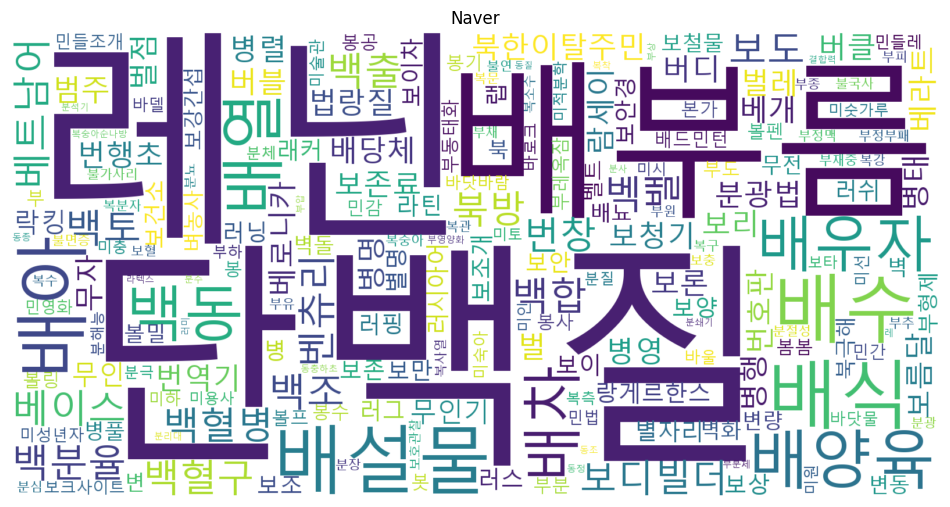

In [144]:
generate_word_cloud(dfCntKotal['word'].value_counts(), font_path, 'Naver') 

**유입 검색어** 네이버 **영어** 키워드 워드 클라우드

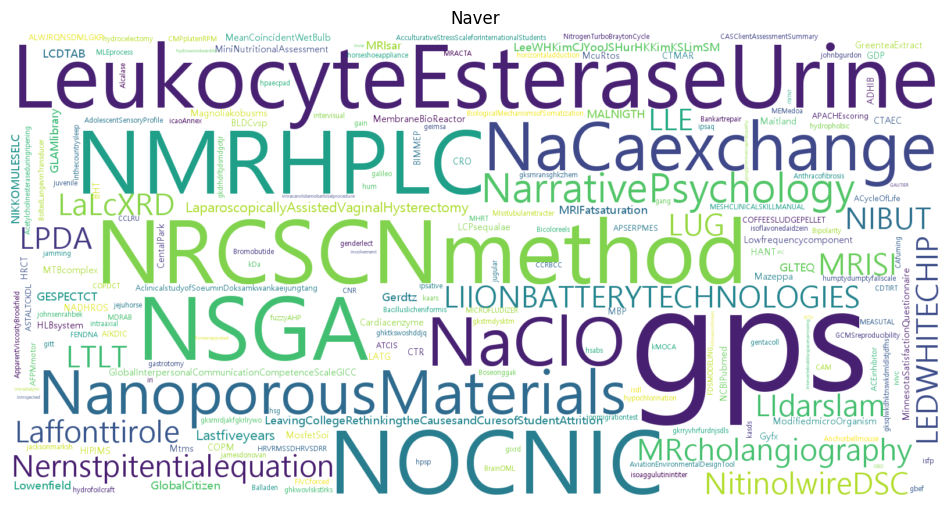

In [145]:
generate_word_cloud(dfCntEntal['word'].value_counts(), font_path, 'Naver') 

In [146]:
def create_horizontal_bar_chart(data, x_column, y_column, color_column, text_column, title_text):
    fig = px.bar(data, orientation='h', x=x_column, y=y_column, color=color_column, text=text_column, barmode='stack')

    title = {
        'text': title_text,
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }

    fig.update_layout(title=title)
    fig.show()


**유입 검색어** 네이버 **한글** 키워드 빈도 그래프

In [147]:
create_horizontal_bar_chart(dfCntKotal.head(200), 'word', 'count', 'word', 'word', "유입 검색어 Naver 한글 Top 200")

In [148]:
fig = px.line(dfCntKotal.head(200), y='count', 
              x='word', color='word', markers=True)
fig.show()

**유입 검색어** 네이버 **영어** 키워드 빈도 그래프

In [149]:
create_horizontal_bar_chart(dfCntEntal.head(200), 'word', 'count', 'word', 'word', "유입 검색어 Naver 영어 Top 200")

In [150]:
fig = px.line(dfCntEntal.head(200), y='count', 
              x='word', color='word', markers=True)
fig.show()